In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # ÏòàÏãú: ÎßëÏùÄ Í≥†ÎîïÏúºÎ°ú ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω Ïãú)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data=pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/ÏµúÏ¢ÖÏßàÎ≥ëÏòàÏ∏°/ÏµúÏ¢Ö_Í±¥Í∞ïÍ≤ÄÏßÑ_Îç∞Ïù¥ÌÑ∞ÏÖã.csv")

In [3]:
data=pd.read_csv("C:/semi_project/health_checkup/JDM/ÏµúÏ¢ÖÏßàÎ≥ëÏòàÏ∏°/ÏµúÏ¢Ö_Í±¥Í∞ïÍ≤ÄÏßÑ_Îç∞Ïù¥ÌÑ∞ÏÖã.csv")

**EDA**

In [206]:
data.shape

(19310, 27)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19310 entries, 0 to 19309
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           19310 non-null  object 
 1   year         19310 non-null  float64
 2   age          19310 non-null  float64
 3   sex          19310 non-null  float64
 4   HE_ht        19011 non-null  float64
 5   HE_wt        19208 non-null  float64
 6   HE_wc        18373 non-null  float64
 7   HE_BMI       19005 non-null  float64
 8   HE_sbp1      18585 non-null  float64
 9   HE_dbp1      18585 non-null  float64
 10  HE_Upro      17722 non-null  float64
 11  HE_glu       17711 non-null  float64
 12  HE_HbA1c     17676 non-null  float64
 13  HE_chol      17711 non-null  float64
 14  HE_HDL_st2   17710 non-null  float64
 15  HE_TG        17711 non-null  float64
 16  HE_LDL_drct  12790 non-null  float64
 17  HE_crea      17711 non-null  float64
 18  HE_ast       17710 non-null  float64
 19  HE_a

In [5]:
# Î∂ÑÏÑùÌï† ÎãπÎá® Í¥ÄÎ†® Ïª¨Îüº Î™©Î°ù
dm_columns = ['HE_DM_HbA1c']

# Í≤∞Ï∏°Ïπò Í∞úÏàòÏôÄ ÎπÑÏú® Í≥ÑÏÇ∞
for col in dm_columns:
    total = len(data)
    missing = data[col].isna().sum()
    ratio = missing / total * 100
    print(f"{col} Í≤∞Ï∏°Ïπò: {missing}Í∞ú ({ratio:.2f}%)")


HE_DM_HbA1c Í≤∞Ï∏°Ïπò: 4682Í∞ú (24.25%)


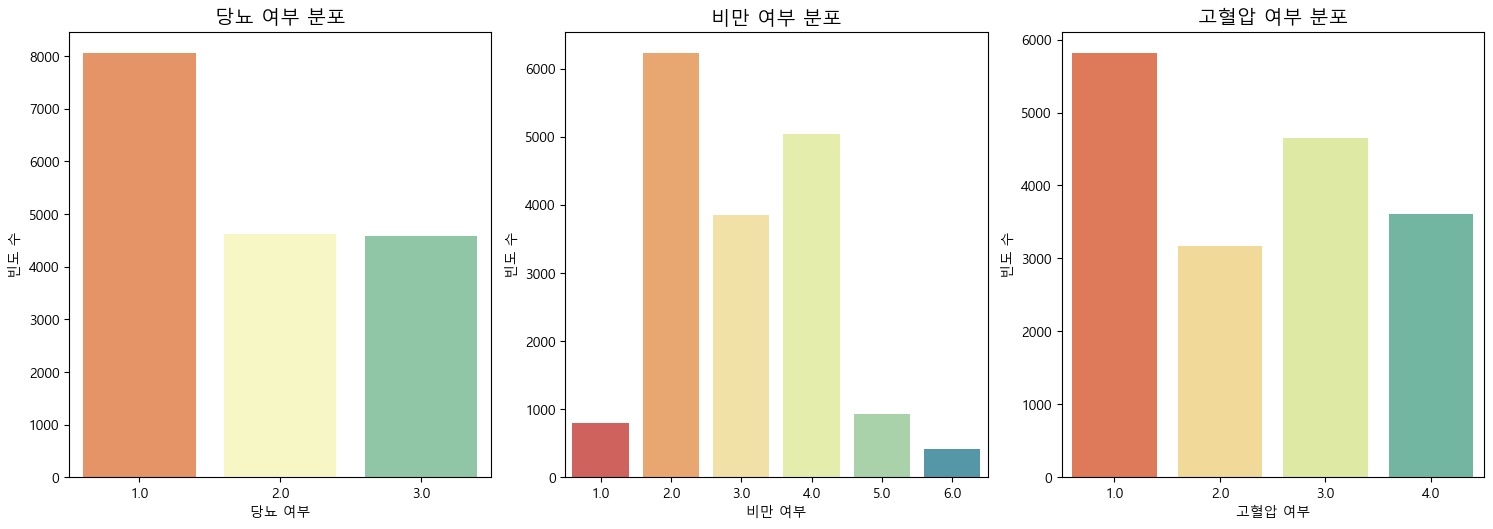

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'ÎãπÎá® Ïó¨Î∂Ä',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [5]:
# Í≥µÎ≥µÌòàÎãπ: 50 Ïù¥ÏÉÅ & 350 Ïù¥Ìïò
data = data[(data['HE_glu'] >= 50) & (data['HE_glu'] <= 350)]

# ALT (Í∞ÑÏàòÏπò): 400 ÎØ∏Îßå
data = data[data['HE_alt'] < 400]

In [4]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg','DE1_pt', 'DI1_pt'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]


In [57]:
# 1. ÏßÑÎã® ÏûêÏ≤¥Î•º Ïïà Î∞õÏùÄ ÏÇ¨ÎûåÎßå ÌïÑÌÑ∞ÎßÅ
undiagnosed = data[data["DI1_pt"] == 8]

# 2. Í∞Å ÏßàÎ≥ëÎ≥Ñ Î∂ÑÌè¨ ÌôïÏù∏
print("‚úÖ HE_HP (Í≥†ÌòàÏïï Îã®Í≥Ñ) Î∂ÑÌè¨:")
print(undiagnosed["HE_HP"].value_counts().sort_index())
print()

print("‚úÖ HE_obe (ÎπÑÎßå Îã®Í≥Ñ) Î∂ÑÌè¨:")
print(undiagnosed["HE_obe"].value_counts().sort_index())
print()

print("‚úÖ HE_DM_HbA1c (ÎãπÎá® Ïó¨Î∂Ä) Î∂ÑÌè¨:")
print(undiagnosed["HE_DM_HbA1c"].value_counts().sort_index())

‚úÖ HE_HP (Í≥†ÌòàÏïï Îã®Í≥Ñ) Î∂ÑÌè¨:
HE_HP
1.0    5074
2.0    3084
3.0    3186
4.0     722
Name: count, dtype: int64

‚úÖ HE_obe (ÎπÑÎßå Îã®Í≥Ñ) Î∂ÑÌè¨:
HE_obe
1.0     488
2.0    4646
3.0    2690
4.0    3233
5.0     567
6.0     124
Name: count, dtype: int64

‚úÖ HE_DM_HbA1c (ÎãπÎá® Ïó¨Î∂Ä) Î∂ÑÌè¨:
HE_DM_HbA1c
1.0    5267
2.0    2840
3.0    2038
Name: count, dtype: int64


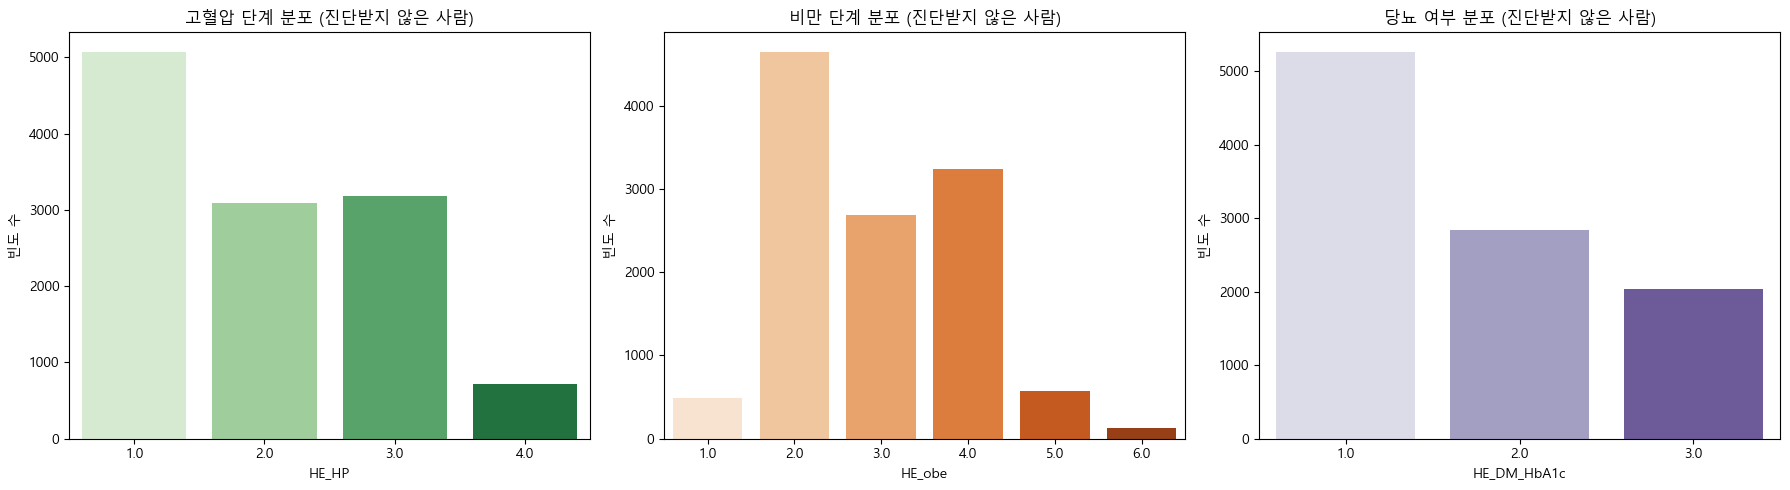

In [58]:
# ÏΩîÎìú Ïã§Ìñâ ÌôòÍ≤Ω Ï¥àÍ∏∞ÌôîÎ°ú Ïù∏Ìï¥ ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Ïû¨ÏûÑÌè¨Ìä∏ Î∞è Îç∞Ïù¥ÌÑ∞ Ïû¨Ï†ïÏùò
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÏßÑÎã®Î∞õÏßÄ ÏïäÏùÄ ÏÇ¨ÎûåÎßå ÌïÑÌÑ∞ÎßÅ
undiagnosed = data[data["DI1_pt"] == 8]

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# HE_HP: Í≥†ÌòàÏïï Îã®Í≥Ñ
sns.countplot(x="HE_HP", data=undiagnosed, ax=axes[0], palette="Greens")
axes[0].set_title("Í≥†ÌòàÏïï Îã®Í≥Ñ Î∂ÑÌè¨ (ÏßÑÎã®Î∞õÏßÄ ÏïäÏùÄ ÏÇ¨Îûå)")
axes[0].set_xlabel("HE_HP")
axes[0].set_ylabel("ÎπàÎèÑ Ïàò")

# HE_obe: ÎπÑÎßå Îã®Í≥Ñ
sns.countplot(x="HE_obe", data=undiagnosed, ax=axes[1], palette="Oranges")
axes[1].set_title("ÎπÑÎßå Îã®Í≥Ñ Î∂ÑÌè¨ (ÏßÑÎã®Î∞õÏßÄ ÏïäÏùÄ ÏÇ¨Îûå)")
axes[1].set_xlabel("HE_obe")
axes[1].set_ylabel("ÎπàÎèÑ Ïàò")

# HE_DM_HbA1c: ÎãπÎá® Ïó¨Î∂Ä
sns.countplot(x="HE_DM_HbA1c", data=undiagnosed, ax=axes[2], palette="Purples")
axes[2].set_title("ÎãπÎá® Ïó¨Î∂Ä Î∂ÑÌè¨ (ÏßÑÎã®Î∞õÏßÄ ÏïäÏùÄ ÏÇ¨Îûå)")
axes[2].set_xlabel("HE_DM_HbA1c")
axes[2].set_ylabel("ÎπàÎèÑ Ïàò")

plt.tight_layout()
plt.show()


ÏπòÎ£åÏó¨Î∂Ä ÎπÑÌï¥Îãπ(ÏùòÏÇ¨ÏßÑÎã® Î∞õÏßÄ ÏïäÏùå) -> ÏßÑÎã®ÏûêÏ≤¥Î•º Ïïà Î∞õÏùå -> ÏπòÎ£å Î∞õÏùÄÏ†Å ÏóÜÏùå => Í∞Å ÏßàÎ≥ë Í∏∞Ï§ÄÏπòÏóê Îî∞Î•∏ Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥

In [ ]:
import pandas as pd
import numpy as np

# --- HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Í∞úÏÑ† ---

# 1. 9, 99, 999, 888 Îì±ÏùÑ NaNÏúºÎ°ú Ï≤òÎ¶¨
data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)

# Ï°∞Í±¥ 1-1: DE1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_DM_HbA1cÍ∞Ä NaN & Í≥µÎ≥µÌòàÎãπ Ï†ïÏÉÅ (70 < HE_glu < 100)
condition_glu_normal = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
   (data['HE_glu'] > 70) & data['HE_glu'] < 100
)
data.loc[condition_glu_normal, 'HE_DM_HbA1c'] = 1 # 1: ÎãπÎá® Ï†ïÏÉÅ
print(f"HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ<100' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. ({condition_glu_normal.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-2: DE1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_DM_HbA1cÍ∞Ä NaN & Í≥µÎ≥µÌòàÎãπÏû•Ïï† (100 <= HE_glu <= 125)
condition_glu_pre_diabetes = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
    (data['HE_glu'] >= 100) & (data['HE_glu'] <= 125)
)
data.loc[condition_glu_pre_diabetes, 'HE_DM_HbA1c'] = 2 #ÎãπÎá®Î≥ë Ï†ÑÎã®Í≥Ñ
print(f"HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & 100<=Í≥µÎ≥µÌòàÎãπ<=125' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. ({condition_glu_pre_diabetes.sum()}Í∞ú)")

# Ï°∞Í±¥ 1-3: DE1_pt 0 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_DM_HbA1cÍ∞Ä NaN & Í≥µÎ≥µÌòàÎãπ ÎãπÎá® >= 126
# Ïù¥Îäî ÏùòÏÇ¨ ÏßÑÎã®ÏùÄ ÏóÜÏßÄÎßå Í≥µÎ≥µÌòàÎãπÏúºÎ°ú Î≥º Îïå ÎãπÎá®Î≥ëÏúºÎ°ú ÏùòÏã¨ÎêòÎäî Í≤ΩÏö∞ÏûÖÎãàÎã§.
condition_glu_diabetes_suspect = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
    data['HE_glu'] >= 126
)
data.loc[condition_glu_diabetes_suspect, 'HE_DM_HbA1c'] = 3 # 3: ÎãπÎá®Î≥ë
print(f"HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ>=126' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3ÏúºÎ°ú Ï±ÑÏõÄ. ({condition_glu_diabetes_suspect.sum()}Í∞ú)")


# 3. ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÌïòÍ±∞ÎÇò Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Ï≤òÎ¶¨ (Í∏∞Ï°¥Í≥º ÎèôÏùº)
#    ÏúÑÏóêÏÑú Ï†ïÏùòÎêòÏßÄ ÏïäÏùÄ ÏºÄÏù¥Ïä§ (Ïòà: HE_gluÍ∞Ä NaNÏù¥Í±∞ÎÇò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÎäî Í≤ΩÏö∞, ÎòêÎäî Îã§Î•∏ Ïù¥Ïú†Î°ú ÎÇ®ÏùÄ NaN)
#    Ïù¥ÌõÑ Î™®Îç∏ ÌïôÏäµÏóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎèÑÎ°ù Ï≤òÎ¶¨Ìï©ÎãàÎã§.
if data['HE_DM_HbA1c'].isnull().any():
    initial_nan_count_after_fill = data['HE_DM_HbA1c'].isnull().sum()
    data = data[data['HE_DM_HbA1c'].notnull()] # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    print(f"ÎÇ®ÏùÄ HE_DM_HbA1c Í≤∞Ï∏°Ïπò ({initial_nan_count_after_fill}Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.")
else:
    print("Î™®Îì† HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

print(f"HE_DM_HbA1c NaN count after all processing: {data['HE_DM_HbA1c'].isnull().sum()}")
print("\nHE_DM_HbA1c ÏµúÏ¢Ö Î∂ÑÌè¨:")
print(data['HE_DM_HbA1c'].value_counts(dropna=False))

HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ<100' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. (2140Í∞ú)
HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & 100<=Í≥µÎ≥µÌòàÎãπ<=125' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. (639Í∞ú)
HE_DM_HbA1c Í≤∞Ï∏°Ïπò Ï§ë 'DE1_pt=8 & Í≥µÎ≥µÌòàÎãπ>=126' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3ÏúºÎ°ú Ï±ÑÏõÄ. (101Í∞ú)
ÎÇ®ÏùÄ HE_DM_HbA1c Í≤∞Ï∏°Ïπò (1802Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.
HE_DM_HbA1c NaN count after all processing: 0

HE_DM_HbA1c ÏµúÏ¢Ö Î∂ÑÌè¨:
HE_DM_HbA1c
1.0    8205
2.0    4685
3.0    4618
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np


# --- HE_HP Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Í∞úÏÑ† (ÏàòÏ†ïÎêú ÏΩîÎìú) ---

# 1. 9, 99, 999, 888 Îì±ÏùÑ NaNÏúºÎ°ú Ï≤òÎ¶¨
data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)


# Ï°∞Í±¥ 1-1: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï Ï†ïÏÉÅ
condition_hp_normal = (
    data['DI1_pt'] == 8 # Ïù¥ Î∂ÄÎ∂ÑÏùÑ 'DE1_dg'Î°ú ÏÇ¨Ïö©ÌïòÎ†§Î©¥ data['DE1_dg'] == 0 ÏúºÎ°ú Î≥ÄÍ≤Ω
) & (
    data['HE_HP'].isnull()
) & (
    data['HE_sbp1'] < 120
) & (
    data['HE_dbp1'] < 80
) 

# !!! Ï§ëÏöî: Ïó¨Í∏∞ Î≥ÄÏàòÎ™ÖÏùÑ Ïò¨Î∞îÎ•∏ Í≤ÉÏúºÎ°ú ÏàòÏ†ï !!!
data.loc[condition_hp_normal, 'HE_HP'] = 1 # 1: ÌòàÏïï Ï†ïÏÉÅ
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & ÌòàÏïï/ÏΩúÎ†àÏä§ÌÖåÎ°§/BMI/ÌòàÎãπ Ï†ïÏÉÅ Ï°∞Í±¥ ÎßåÏ°±'ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. ({condition_hp_normal.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-2: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Ï£ºÏùò ÌòàÏïï' Î≤îÏúÑ
condition_hp_pre_attention = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 120) & (data['HE_sbp1'] < 130) & (data['HE_dbp1'] < 80)
)
data.loc[condition_hp_pre_attention, 'HE_HP'] = 2 # 2: Ï£ºÏùò ÌòàÏïï
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 120<=ÏàòÏ∂ïÍ∏∞<130 & Ïù¥ÏôÑÍ∏∞<80' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. ({condition_hp_pre_attention.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-3: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ' Î≤îÏúÑ
condition_hp_pre_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 130) & (data['HE_sbp1'] < 140) & (data['HE_dbp1'] < 90)
)
data.loc[condition_hp_pre_hypertension, 'HE_HP'] = 3 # 3: Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 130<=ÏàòÏ∂ïÍ∏∞<140 & Ïù¥ÏôÑÍ∏∞<90' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3Î°ú Ï±ÑÏõÄ. ({condition_hp_pre_hypertension.sum()}Í∞ú)")


# Ï°∞Í±¥ 1-4: DI1_pt 8 (ÏùòÏÇ¨ ÏßÑÎã® ÏóÜÏùå) & HE_HP NaN & ÏàòÏ∂ïÍ∏∞,Ïù¥ÏôÑÍ∏∞ ÌòàÏïï 'Í≥†ÌòàÏïï' Î≤îÏúÑ
condition_hp_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 140) | (data['HE_dbp1'] >= 90)
)
# !!! Ï§ëÏöî: Ïó¨Í∏∞ Î≥ÄÏàòÎ™ÖÏùÑ Ïò¨Î∞îÎ•∏ Í≤ÉÏúºÎ°ú ÏàòÏ†ï !!!
data.loc[condition_hp_hypertension, 'HE_HP'] = 4 # 4: Í≥†ÌòàÏïï
print(f"HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & (ÏàòÏ∂ïÍ∏∞>=140 ÎòêÎäî Ïù¥ÏôÑÍ∏∞>=90)' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 4Î°ú Ï±ÑÏõÄ. ({condition_hp_hypertension.sum()}Í∞ú)")


# 3. ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÌïòÍ±∞ÎÇò Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Ï≤òÎ¶¨
#    ÏúÑÏóêÏÑú Ï†ïÏùòÎêòÏßÄ ÏïäÏùÄ ÏºÄÏù¥Ïä§ (Ïòà: DI1_ptÍ∞Ä 8Ïù¥ ÏïÑÎãàÍ±∞ÎÇò, ÌòàÏïï/ÏΩúÎ†àÏä§ÌÖåÎ°§ Îì± ÏßÄÌëúÍ∞Ä NaNÏù∏ Í≤ΩÏö∞ Îì±)
if data['HE_HP'].isnull().any():
    initial_nan_count_after_fill = data['HE_HP'].isnull().sum()
    data = data[data['HE_HP'].notnull()].copy() # .copy()Î•º Ï∂îÍ∞ÄÌïòÏó¨ SettingWithCopyWarning Î∞©ÏßÄ
    print(f"ÎÇ®ÏùÄ HE_HP Í≤∞Ï∏°Ïπò ({initial_nan_count_after_fill}Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.")
else:
    print("Î™®Îì† HE_HP Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

print(f"\nHE_HP NaN count after all processing: {data['HE_HP'].isnull().sum()}")
print("\nHE_HP ÏµúÏ¢Ö Î∂ÑÌè¨:")
print(data['HE_HP'].value_counts(dropna=False))

HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & ÌòàÏïï/ÏΩúÎ†àÏä§ÌÖåÎ°§/BMI/ÌòàÎãπ Ï†ïÏÉÅ Ï°∞Í±¥ ÎßåÏ°±'ÌïòÎäî Í≤ΩÏö∞ 1Î°ú Ï±ÑÏõÄ. (678Í∞ú)
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 120<=ÏàòÏ∂ïÍ∏∞<130 & Ïù¥ÏôÑÍ∏∞<80' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 2Î°ú Ï±ÑÏõÄ. (104Í∞ú)
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & 130<=ÏàòÏ∂ïÍ∏∞<140 & Ïù¥ÏôÑÍ∏∞<90' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 3Î°ú Ï±ÑÏõÄ. (33Í∞ú)
HE_HP Í≤∞Ï∏°Ïπò Ï§ë 'DI1_pt=8 & (ÏàòÏ∂ïÍ∏∞>=140 ÎòêÎäî Ïù¥ÏôÑÍ∏∞>=90)' Ï°∞Í±¥ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞ 4Î°ú Ï±ÑÏõÄ. (10Í∞ú)
ÎÇ®ÏùÄ HE_HP Í≤∞Ï∏°Ïπò (249Í∞ú) Ï†úÍ±∞ ÏôÑÎ£å.

HE_HP NaN count after all processing: 0

HE_HP ÏµúÏ¢Ö Î∂ÑÌè¨:
HE_HP
1.0    5814
3.0    4654
4.0    3615
2.0    3176
Name: count, dtype: int64


In [6]:
# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

HE_obe NaN count after: 0


In [7]:
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'HE_HbA1c'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data


print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:")
print(data.isnull().sum())
print("\nÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(data.describe())

# Ï†ÑÏ≤òÎ¶¨ ÏΩîÎìú ÎÅùÏóê Ï∂îÍ∞Ä
data.to_csv("ÏµúÏ¢Ö_Í±¥Í∞ïÍ≤ÄÏßÑ_Îç∞Ïù¥ÌÑ∞ÏÖã(Í∞ÄÍ≥µÎêú).csv", index=False, encoding='utf-8-sig')

Median for HE_wt: 62.9
Median for HE_ht: 162.7
Median for HE_BMI: 23.872117440478384
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_HbA1c          0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
DE1_pt            0
DI1_pt            0
HE_BMI_imputed    0
dtype: int64

ÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:

HE_DM_HbA1c:
HE_DM_HbA1c
1.0    0.466771
2.0    0.267860
3.0    0.265369
Name: proportion, dtype: float64

HE_obe:
HE_obe
2.0    0.360855
4.0    0.291790
3.0    0.222782
5.0    0.054001
1.0    0.046584
6.0    0.023987
Name: proportion, dtype: float64

HE_HP:
HE_HP
1.0 

In [5]:
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")


# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")

print("\HE_HP ÏµúÏ¢Ö Î∂ÑÌè¨:")
print(data['HE_HP'].value_counts(dropna=False))

continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'HE_HbA1c'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data

# knn_scaler_filename = 'HE_DM_HbA1c_knn_scaler.pkl'
# knn_imputer_filename = 'HE_DM_HbA1c_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_obe_knn_scaler.pkl'
# knn_imputer_filename = 'HE_obe_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_HP_knn_scaler.pkl'
# knn_imputer_filename = 'HE_HP_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)

print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:")
print(data.isnull().sum())
print("\nÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(data.describe())

# Ï†ÑÏ≤òÎ¶¨ ÏΩîÎìú ÎÅùÏóê Ï∂îÍ∞Ä
#data.to_csv('Í±¥Í∞ïÏ°∞ÏÇ¨_2022~2023_ÌÜµÌï©(Í∞ÄÍ≥µÎêú).csv', index=False, encoding='utf-8-sig')

DE1_dg missing ratio: 0.0004660797514241326
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
\HE_HP ÏµúÏ¢Ö Î∂ÑÌè¨:
HE_HP
1.0    5442
3.0    4738
4.0    3852
2.0    3106
Name: count, dtype: int64
Median for HE_wt: 63.2
Median for HE_ht: 162.7
Median for HE_BMI: 23.98917739031172
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_HbA1c          0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
DE1_pt            0
DI1_pt            0
HE_BMI_imputed    0
dtype: int64

ÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:

HE_DM_HbA1c:
HE_

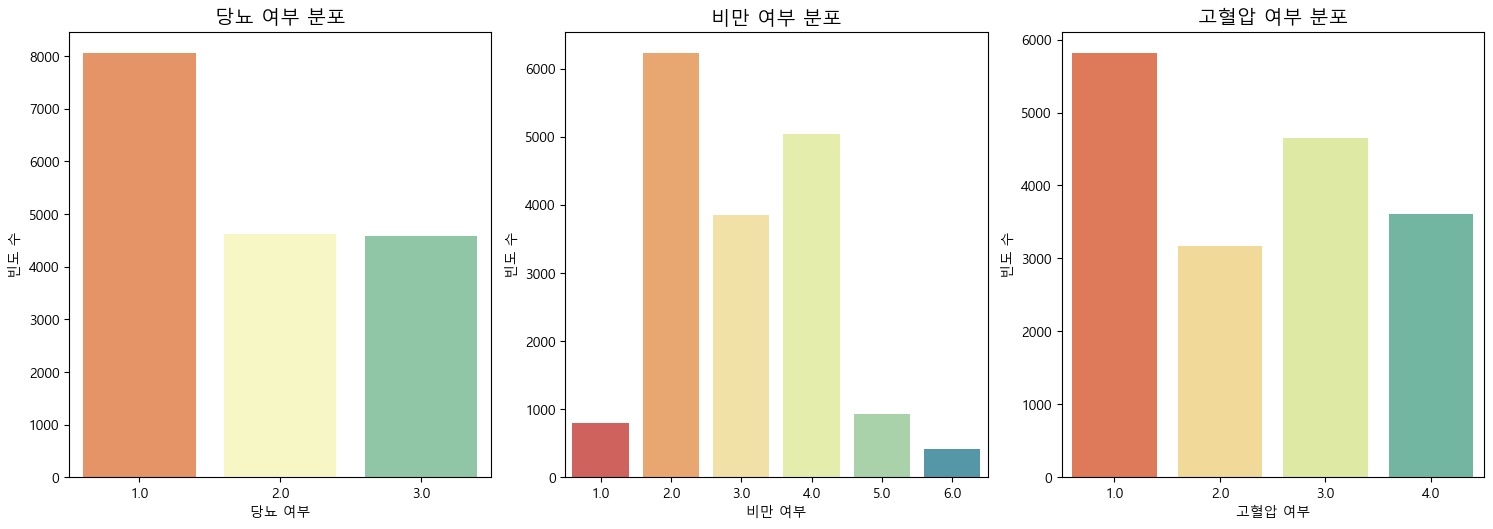

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'ÎãπÎá® Ïó¨Î∂Ä',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


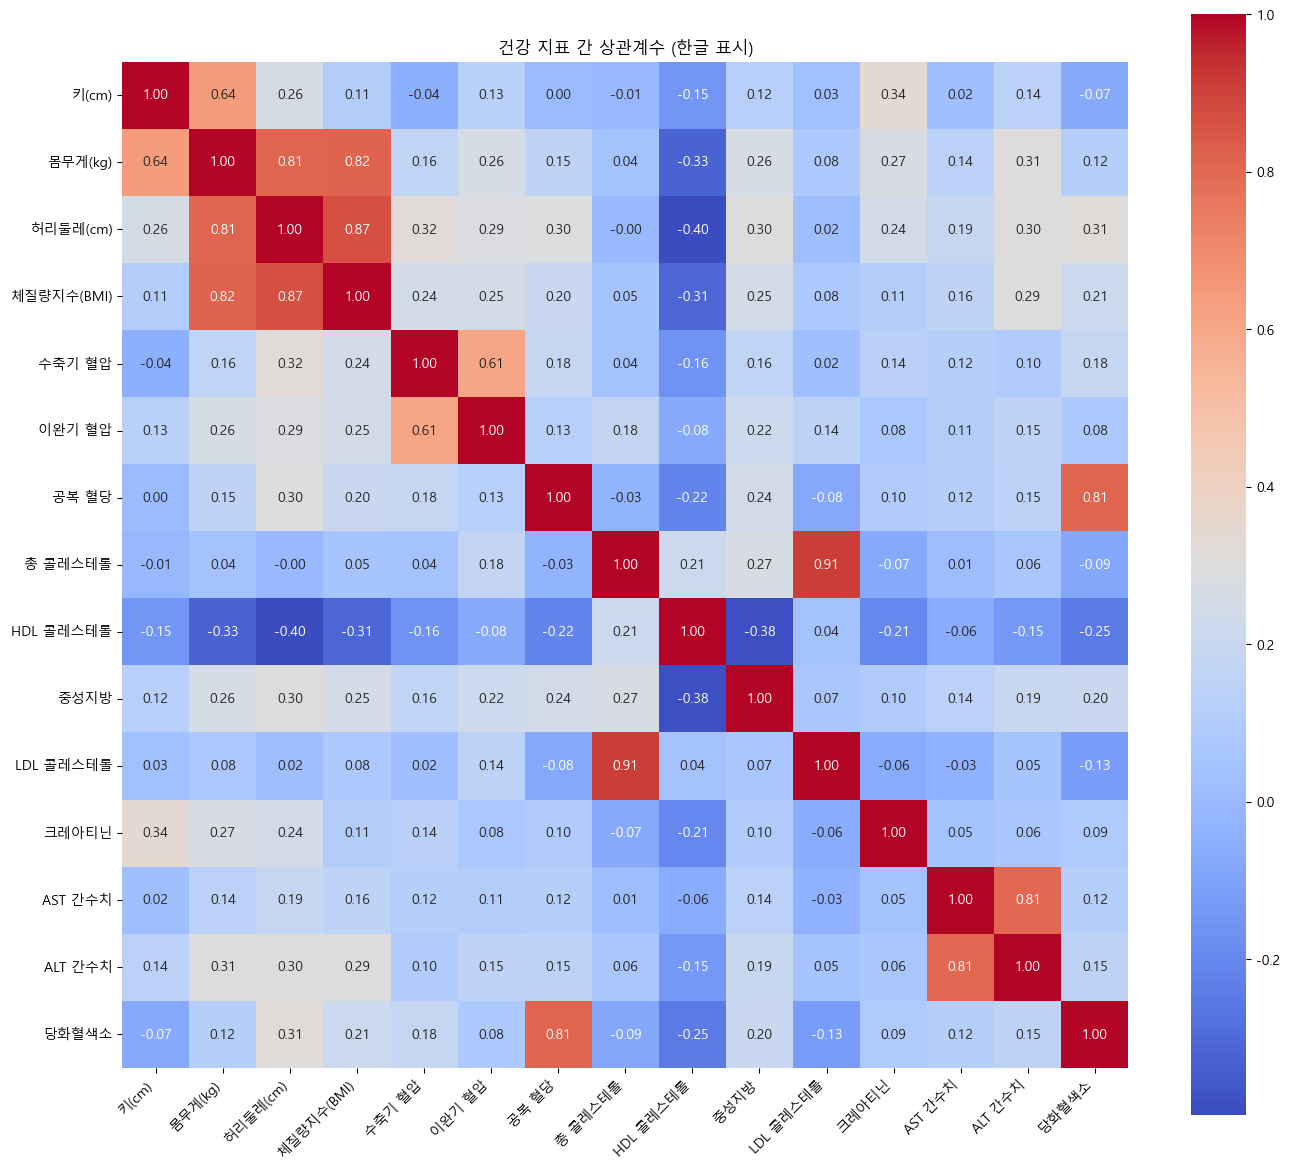

In [150]:
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò',
    'HE_HbA1c' : 'ÎãπÌôîÌòàÏÉâÏÜå'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2', 'HE_HbA1c'
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DE1_3', 'DI1_pt'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Î≥¥Í≥† Ïã∂ÏùÄ Î≥ÄÏàòÎßå Ï∂îÏ∂ú
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌïúÍ∏Ä ÌëúÏãú)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# ÏòÅÏñ¥ ‚Üí ÌïúÍ∏Ä ÎßµÌïë
column_name_map = {
    'age': 'ÎÇòÏù¥',
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±', 'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ', 'HE_HbA1c': 'ÎãπÌôîÌòàÏÉâÏÜå',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST Í∞ÑÏàòÏπò', 'HE_alt': 'ALT Í∞ÑÏàòÏπò'
}

# Î∂ÑÏÑù ÎåÄÏÉÅ ÏàòÏπòÌòï ÌîºÏ≤ò
num_features = list(column_name_map.keys())

# ÏûÖÎ†•(X), ÌÉÄÍ≤ü(y)
X = data[num_features]
y = data["HE_HP"]  # Í≥†ÌòàÏïï Ïó¨Î∂Ä

# ÏÉÅÌò∏Ï†ïÎ≥¥Îüâ Í≥ÑÏÇ∞
mi = mutual_info_classif(X, y, discrete_features=False, random_state=0)

# Ïù∏Îç±Ïä§Î•º 'ÏòÅÎ¨∏(ÌïúÍ∏Ä)' ÌòïÏãùÏúºÎ°ú Ï†ïÎ¶¨
display_names = [f"{col} ({column_name_map[col]})" for col in num_features]
mi_series = pd.Series(mi, index=display_names).sort_values(ascending=False)

# Ï∂úÎ†•
print("üîç Í≥†ÌòàÏïï Í¥ÄÎ†® Î≥ÄÏàò Ï§ëÏöîÎèÑ (Mutual Information Í∏∞Ï§Ä):\n")
print(mi_series)


üîç Í≥†ÌòàÏïï Í¥ÄÎ†® Î≥ÄÏàò Ï§ëÏöîÎèÑ (Mutual Information Í∏∞Ï§Ä):

HE_sbp1 (ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)           0.498769
HE_dbp1 (Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)           0.243271
HE_LDL_drct (LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)    0.168114
age (ÎÇòÏù¥)                   0.113568
HE_wc (ÌóàÎ¶¨ÎëòÎ†à(cm))           0.063934
HE_HbA1c (ÎãπÌôîÌòàÏÉâÏÜå)           0.063804
HE_glu (Í≥µÎ≥µ ÌòàÎãπ)             0.049954
HE_BMI (Ï≤¥ÏßàÎüâÏßÄÏàò(BMI))        0.041385
HE_ast (AST Í∞ÑÏàòÏπò)           0.035967
HE_alt (ALT Í∞ÑÏàòÏπò)           0.030820
HE_HDL_st2 (HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)     0.030170
HE_TG (Ï§ëÏÑ±ÏßÄÎ∞©)               0.026088
HE_chol (Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)          0.018640
HE_ht (ÌÇ§(cm))              0.018325
HE_crea (ÌÅ¨Î†àÏïÑÌã∞Îãå)            0.016663
HE_wt (Î™∏Î¨¥Í≤å(kg))            0.010097
HE_Upro (ÏÜåÎ≥Ä Îã®Î∞±)            0.002532
dtype: float64


In [8]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# ÏòÅÏñ¥ ‚Üí ÌïúÍ∏Ä ÎßµÌïë
column_name_map = {
    'age': 'ÎÇòÏù¥',
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±', 'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ', 'HE_HbA1c': 'ÎãπÌôîÌòàÏÉâÏÜå',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST Í∞ÑÏàòÏπò', 'HE_alt': 'ALT Í∞ÑÏàòÏπò'
}

# Î∂ÑÏÑù ÎåÄÏÉÅ ÏàòÏπòÌòï ÌîºÏ≤ò
num_features = list(column_name_map.keys())

# ÏûÖÎ†•(X), ÌÉÄÍ≤ü(y)
X = data[num_features]
y = data["HE_DM_HbA1c"]  # Í≥†ÌòàÏïï Ïó¨Î∂Ä

# ÏÉÅÌò∏Ï†ïÎ≥¥Îüâ Í≥ÑÏÇ∞
mi = mutual_info_classif(X, y, discrete_features=False, random_state=0)

# Ïù∏Îç±Ïä§Î•º 'ÏòÅÎ¨∏(ÌïúÍ∏Ä)' ÌòïÏãùÏúºÎ°ú Ï†ïÎ¶¨
display_names = [f"{col} ({column_name_map[col]})" for col in num_features]
mi_series = pd.Series(mi, index=display_names).sort_values(ascending=False)

# Ï∂úÎ†•
print("üîç ÎãπÎá®Î≥ë Í¥ÄÎ†® Î≥ÄÏàò Ï§ëÏöîÎèÑ (Mutual Information Í∏∞Ï§Ä):\n")
print(mi_series)


üîç ÎãπÎá®Î≥ë Í¥ÄÎ†® Î≥ÄÏàò Ï§ëÏöîÎèÑ (Mutual Information Í∏∞Ï§Ä):

HE_HbA1c (ÎãπÌôîÌòàÏÉâÏÜå)           0.530560
HE_glu (Í≥µÎ≥µ ÌòàÎãπ)             0.469705
HE_LDL_drct (LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)    0.110376
age (ÎÇòÏù¥)                   0.099317
HE_wc (ÌóàÎ¶¨ÎëòÎ†à(cm))           0.077431
HE_HDL_st2 (HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)     0.057577
HE_chol (Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)          0.048504
HE_sbp1 (ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)           0.043492
HE_BMI (Ï≤¥ÏßàÎüâÏßÄÏàò(BMI))        0.042277
HE_alt (ALT Í∞ÑÏàòÏπò)           0.040888
HE_ast (AST Í∞ÑÏàòÏπò)           0.035510
HE_crea (ÌÅ¨Î†àÏïÑÌã∞Îãå)            0.027333
HE_TG (Ï§ëÏÑ±ÏßÄÎ∞©)               0.024971
HE_dbp1 (Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)           0.022281
HE_Upro (ÏÜåÎ≥Ä Îã®Î∞±)            0.013389
HE_wt (Î™∏Î¨¥Í≤å(kg))            0.011143
HE_ht (ÌÇ§(cm))              0.010322
dtype: float64


In [9]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# ÏòÅÏñ¥ ‚Üí ÌïúÍ∏Ä ÎßµÌïë
column_name_map = {
    'age': 'ÎÇòÏù¥',
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±', 'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ', 'HE_HbA1c': 'ÎãπÌôîÌòàÏÉâÏÜå',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST Í∞ÑÏàòÏπò', 'HE_alt': 'ALT Í∞ÑÏàòÏπò'
}

# Î∂ÑÏÑù ÎåÄÏÉÅ ÏàòÏπòÌòï ÌîºÏ≤ò
num_features = list(column_name_map.keys())

# ÏûÖÎ†•(X), ÌÉÄÍ≤ü(y)
X = data[num_features]
y = data["HE_obe"]  # Í≥†ÌòàÏïï Ïó¨Î∂Ä

# ÏÉÅÌò∏Ï†ïÎ≥¥Îüâ Í≥ÑÏÇ∞
mi = mutual_info_classif(X, y, discrete_features=False, random_state=0)

# Ïù∏Îç±Ïä§Î•º 'ÏòÅÎ¨∏(ÌïúÍ∏Ä)' ÌòïÏãùÏúºÎ°ú Ï†ïÎ¶¨
display_names = [f"{col} ({column_name_map[col]})" for col in num_features]
mi_series = pd.Series(mi, index=display_names).sort_values(ascending=False)

# Ï∂úÎ†•
print("üîç ÎãπÎá®Î≥ë Í¥ÄÎ†® Î≥ÄÏàò Ï§ëÏöîÎèÑ (Mutual Information Í∏∞Ï§Ä):\n")
print(mi_series)


üîç ÎãπÎá®Î≥ë Í¥ÄÎ†® Î≥ÄÏàò Ï§ëÏöîÎèÑ (Mutual Information Í∏∞Ï§Ä):

HE_BMI (Ï≤¥ÏßàÎüâÏßÄÏàò(BMI))        1.408993
HE_wc (ÌóàÎ¶¨ÎëòÎ†à(cm))           0.578330
HE_wt (Î™∏Î¨¥Í≤å(kg))            0.433744
HE_alt (ALT Í∞ÑÏàòÏπò)           0.063728
HE_ht (ÌÇ§(cm))              0.060859
HE_HDL_st2 (HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)     0.055260
HE_TG (Ï§ëÏÑ±ÏßÄÎ∞©)               0.048259
HE_sbp1 (ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)           0.042397
HE_glu (Í≥µÎ≥µ ÌòàÎãπ)             0.041735
HE_dbp1 (Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)           0.036799
HE_HbA1c (ÎãπÌôîÌòàÏÉâÏÜå)           0.024695
age (ÎÇòÏù¥)                   0.024434
HE_ast (AST Í∞ÑÏàòÏπò)           0.023991
HE_LDL_drct (LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)    0.017588
HE_crea (ÌÅ¨Î†àÏïÑÌã∞Îãå)            0.012959
HE_Upro (ÏÜåÎ≥Ä Îã®Î∞±)            0.009755
HE_chol (Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)          0.000000
dtype: float64


In [151]:
from sklearn.feature_selection import mutual_info_classif


num_features = [
    'age','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]

X = data[num_features]  # ÏàòÏπòÌòï ÏûÖÎ†• ÌîºÏ≤ò
y = data["HE_HP"]

mi = mutual_info_classif(X, y, discrete_features=False)
mi_series = pd.Series(mi, index=num_features).sort_values(ascending=False)
print(mi_series)


HE_sbp1        0.519383
HE_dbp1        0.260264
HE_LDL_drct    0.193934
age            0.120814
HE_wc          0.080332
HE_HbA1c       0.078789
HE_glu         0.055892
HE_ast         0.053137
HE_BMI         0.050448
HE_alt         0.036308
HE_HDL_st2     0.035815
HE_TG          0.028499
HE_ht          0.019221
HE_wt          0.018951
HE_crea        0.016452
HE_chol        0.010157
HE_Upro        0.007023
dtype: float64


ÏÉÅÏúÑ 6Í∞úÎßå ÌïòÎ†§ÌñàÎçîÎãà ÎåÄÌïúÍ≥†ÌòàÏïïÌïôÌöå Í∏∞Ï§ÄÏóê Í≥µÎ≥µÌòàÎãπÏù¥ 126Ïù¥ÏÉÅÏù¥Î©¥ Í≥†ÌòàÏïï ÏúÑÌóòÎèÑ Ï¶ùÍ∞ÄÎùº ÌñàÍ∏∞Ïóê Ìè¨Ìï®ÏãúÌÇ¥

In [152]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

num_features = [
    'age','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]

# üéØ X: ÏàòÏπòÌòï ÏûÖÎ†• ÌîºÏ≤òÎì§ / y: Î≤îÏ£ºÌòï ÌÉÄÍ≤ü
X = data[num_features]  # ÏàòÏπòÌòï ÌîºÏ≤ò Î¶¨Ïä§Ìä∏Î°ú ÎåÄÏ≤¥ ÌïÑÏöî
y = data['HE_HP'].astype(int)  # Î≤îÏ£ºÌòï ÌÉÄÍ≤ü (Í≥†ÌòàÏïï Îã®Í≥Ñ)

# üîç Mutual Information Í≥ÑÏÇ∞
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)

# üìä Í≤∞Í≥ºÎ•º ÏãúÎ¶¨Ï¶àÎ°ú Î≥ÄÌôòÌïòÍ≥† Ï†ïÎ†¨
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# ‚úÖ ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò Ï∂úÎ†•
top_6_features = mi_series.head(6)
print("üéØ Mutual Information Í∏∞Î∞ò ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò:\n")
print(top_6_features)


üéØ Mutual Information Í∏∞Î∞ò ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò:

HE_sbp1        0.525864
HE_dbp1        0.255809
HE_LDL_drct    0.192247
age            0.126140
HE_wc          0.082582
HE_HbA1c       0.066162
dtype: float64


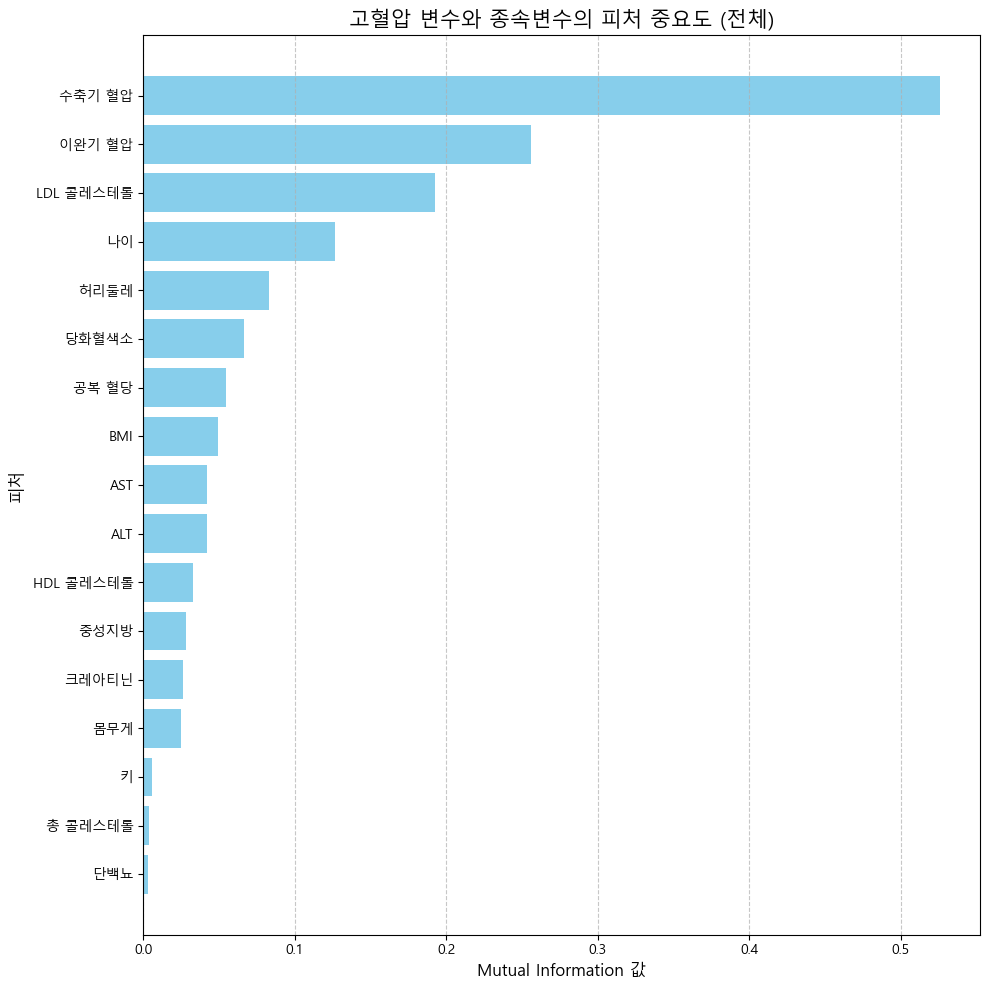

In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



num_features = [
    'age','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]

# üéØ X: ÏàòÏπòÌòï ÏûÖÎ†• ÌîºÏ≤òÎì§ / y: Î≤îÏ£ºÌòï ÌÉÄÍ≤ü
X = data[num_features]
y = data['HE_HP'].astype(int) # Î≤îÏ£ºÌòï ÌÉÄÍ≤ü (Í≥†ÌòàÏïï Îã®Í≥Ñ)

# üîç Mutual Information Í≥ÑÏÇ∞
# discrete_features=FalseÎäî Î™®Îì† ÌîºÏ≤òÎ•º Ïó∞ÏÜçÌòïÏúºÎ°ú Í∞ÑÏ£ºÌïòÎèÑÎ°ù Ìï©ÎãàÎã§.
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)

# üìä Í≤∞Í≥ºÎ•º ÏãúÎ¶¨Ï¶àÎ°ú Î≥ÄÌôòÌïòÍ≥† Ï†ïÎ†¨
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# ÌïúÍ∏Ä ÌîºÏ≤ò Ïù¥Î¶Ñ Îß§Ìïë (Ï†ÑÏ≤¥ ÌîºÏ≤òÏóê ÎåÄÌï¥ Ï†ïÏùò)
korean_feature_names = {
    'age': 'ÎÇòÏù¥',
    'HE_ht': 'ÌÇ§',
    'HE_wt': 'Î™∏Î¨¥Í≤å',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à',
    'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'Îã®Î∞±Îá®',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_HbA1c': 'ÎãπÌôîÌòàÏÉâÏÜå',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST',
    'HE_alt': 'ALT'
}

# Î™®Îì† ÌîºÏ≤òÏùò ÌïúÍ∏Ä Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞ (Ï†ïÎ†¨Îêú ÏàúÏÑúÎåÄÎ°ú)
all_korean_features = [korean_feature_names[col] for col in mi_series.index]

plt.figure(figsize=(10, 10)) # Î™®Îì† ÌîºÏ≤òÎ•º ÌëúÏãúÌïòÍ∏∞ ÏúÑÌï¥ ÏÑ∏Î°ú ÌÅ¨Í∏∞Î•º ÎäòÎ¶º
plt.barh(all_korean_features, mi_series.values, color='skyblue')
plt.xlabel('Mutual Information Í∞í', fontsize=12)
plt.ylabel('ÌîºÏ≤ò', fontsize=12)
plt.title('Í≥†ÌòàÏïï Î≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÏùò ÌîºÏ≤ò Ï§ëÏöîÎèÑ (Ï†ÑÏ≤¥)', fontsize=15)
plt.gca().invert_yaxis() # Í∞ÄÏû• ÎÜíÏùÄ Í∞íÏùÑ ÏúÑÎ°ú Ïò§Í≤å ÌïòÍ∏∞ ÏúÑÌï¥ YÏ∂ï Î∞òÏ†Ñ
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [153]:
from sklearn.feature_selection import mutual_info_classif


num_features = [
    'age','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]

X = data[num_features]  # ÏàòÏπòÌòï ÏûÖÎ†• ÌîºÏ≤ò
y = data["HE_DM_HbA1c"]

mi = mutual_info_classif(X, y, discrete_features=False)
mi_series = pd.Series(mi, index=num_features).sort_values(ascending=False)
print(mi_series)


HE_glu         0.612330
HE_HbA1c       0.562297
age            0.131435
HE_LDL_drct    0.098591
HE_wc          0.094059
HE_BMI         0.057824
HE_HDL_st2     0.043053
HE_sbp1        0.041310
HE_chol        0.039829
HE_TG          0.038403
HE_alt         0.034254
HE_ast         0.033559
HE_dbp1        0.022479
HE_crea        0.019128
HE_Upro        0.014478
HE_ht          0.013268
HE_wt          0.009715
dtype: float64


In [154]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

num_features = [
    'age','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]

# üéØ X: ÏàòÏπòÌòï ÏûÖÎ†• ÌîºÏ≤òÎì§ / y: Î≤îÏ£ºÌòï ÌÉÄÍ≤ü
X = data[num_features]  # ÏàòÏπòÌòï ÌîºÏ≤ò Î¶¨Ïä§Ìä∏Î°ú ÎåÄÏ≤¥ ÌïÑÏöî
y = data['HE_DM_HbA1c'].astype(int)  # Î≤îÏ£ºÌòï ÌÉÄÍ≤ü (Í≥†ÌòàÏïï Îã®Í≥Ñ)

# üîç Mutual Information Í≥ÑÏÇ∞
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)

# üìä Í≤∞Í≥ºÎ•º ÏãúÎ¶¨Ï¶àÎ°ú Î≥ÄÌôòÌïòÍ≥† Ï†ïÎ†¨
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# ‚úÖ ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò Ï∂úÎ†•
top_6_features = mi_series.head(6)
print("üéØ Mutual Information Í∏∞Î∞ò ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò:\n")
print(top_6_features)


üéØ Mutual Information Í∏∞Î∞ò ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò:

HE_glu         0.616670
HE_HbA1c       0.562058
age            0.115624
HE_wc          0.103176
HE_LDL_drct    0.098337
HE_BMI         0.057854
dtype: float64


In [155]:
from sklearn.feature_selection import mutual_info_classif


num_features = [
    'age','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]

X = data[num_features]  # ÏàòÏπòÌòï ÏûÖÎ†• ÌîºÏ≤ò
y = data["HE_obe"]

mi = mutual_info_classif(X, y, discrete_features=False)
mi_series = pd.Series(mi, index=num_features).sort_values(ascending=False)
print(mi_series)


HE_BMI         1.348396
HE_wc          0.599870
HE_wt          0.436432
HE_alt         0.077292
HE_ht          0.055991
age            0.054890
HE_TG          0.052006
HE_glu         0.051261
HE_sbp1        0.051117
HE_HDL_st2     0.050942
HE_HbA1c       0.041740
HE_dbp1        0.033883
HE_ast         0.030055
HE_crea        0.026192
HE_LDL_drct    0.016429
HE_chol        0.012579
HE_Upro        0.009398
dtype: float64


In [156]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# üéØ X: ÏàòÏπòÌòï ÏûÖÎ†• ÌîºÏ≤òÎì§ / y: Î≤îÏ£ºÌòï ÌÉÄÍ≤ü
X = data[num_features]  # ÏàòÏπòÌòï ÌîºÏ≤ò Î¶¨Ïä§Ìä∏Î°ú ÎåÄÏ≤¥ ÌïÑÏöî
y = data['HE_obe'].astype(int)  # Î≤îÏ£ºÌòï ÌÉÄÍ≤ü (Í≥†ÌòàÏïï Îã®Í≥Ñ)

# üîç Mutual Information Í≥ÑÏÇ∞
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)

# üìä Í≤∞Í≥ºÎ•º ÏãúÎ¶¨Ï¶àÎ°ú Î≥ÄÌôòÌïòÍ≥† Ï†ïÎ†¨
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# ‚úÖ ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò Ï∂úÎ†•
top_6_features = mi_series.head(6)
print("üéØ Mutual Information Í∏∞Î∞ò ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò:\n")
print(top_6_features)


üéØ Mutual Information Í∏∞Î∞ò ÏÉÅÏúÑ 6Í∞ú ÌîºÏ≤ò:

HE_BMI        1.348336
HE_wc         0.603457
HE_wt         0.444875
HE_alt        0.077310
HE_HDL_st2    0.061245
HE_TG         0.059272
dtype: float64



‚ñ∂ Mean F1 score (CV) of D_tree: 93.19%
‚ñ∂ Test F1 score of D_tree: 93.50%
‚ñ∂ Test Accuracy of D_tree: 93.42%

‚ñ∂ Mean F1 score (CV) of RF: 93.83%
‚ñ∂ Test F1 score of RF: 93.90%
‚ñ∂ Test Accuracy of RF: 93.83%

‚ñ∂ Mean F1 score (CV) of HistGB: 93.73%
‚ñ∂ Test F1 score of HistGB: 94.29%
‚ñ∂ Test Accuracy of HistGB: 94.24%

‚ñ∂ Mean F1 score (CV) of XGB: 93.46%
‚ñ∂ Test F1 score of XGB: 94.43%
‚ñ∂ Test Accuracy of XGB: 94.38%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 11045, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set

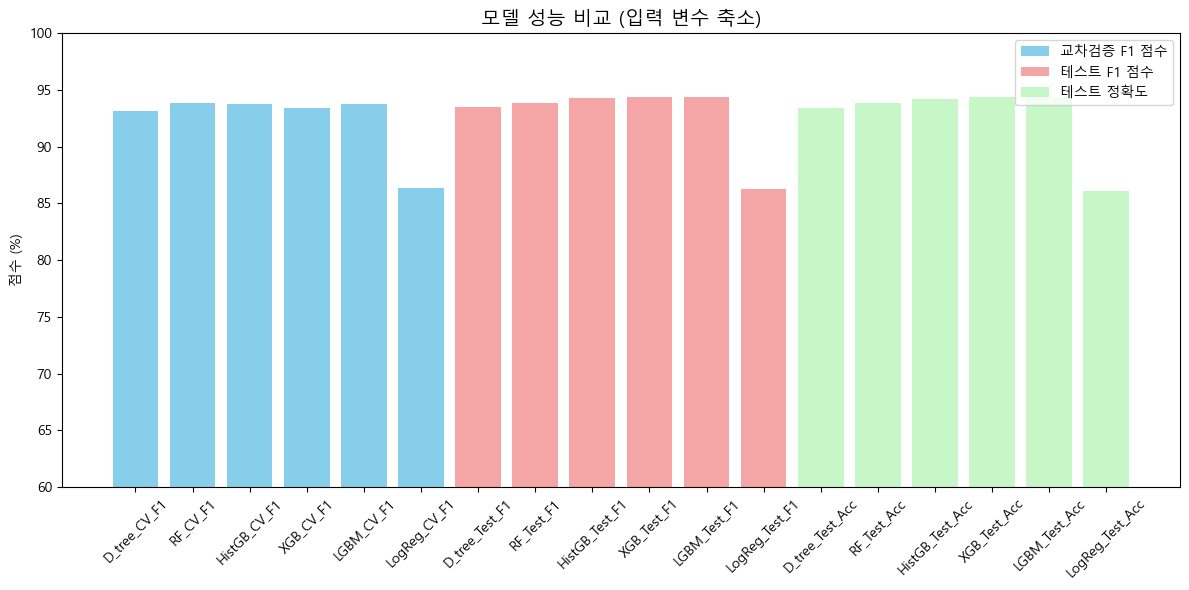

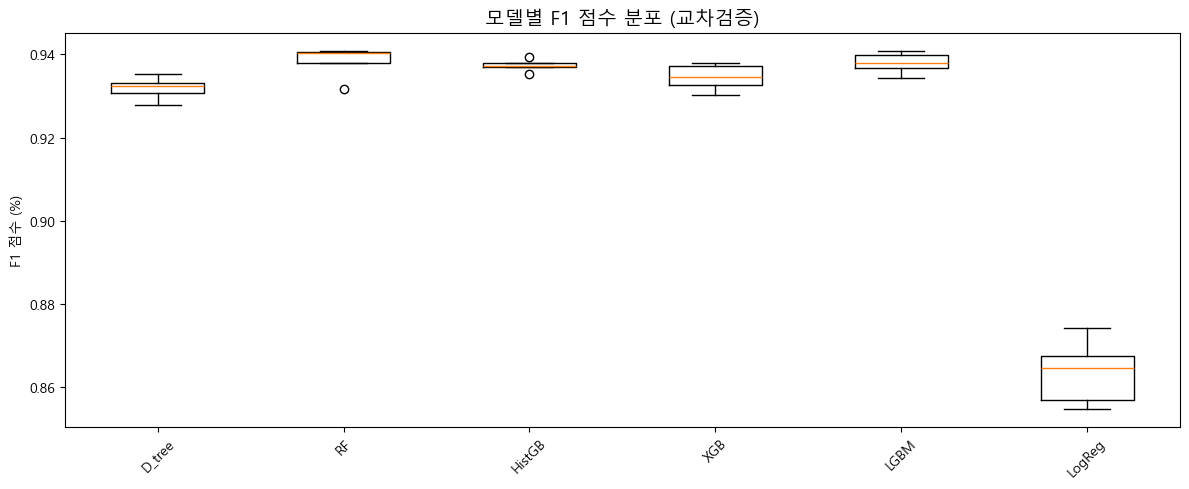

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt



# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_DM_HbA1c_input_features = ['HE_glu','HE_HbA1c', 'HE_wc', 'HE_BMI', 'HE_LDL_drct', 'age']
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• Î∞î Ï∞®Ìä∏ (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÏûÖÎ†• Î≥ÄÏàò Ï∂ïÏÜå)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot (CV F1 Î∂ÑÌè¨)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Ï†êÏàò (%)')
ax.set_title('Î™®Îç∏Î≥Ñ F1 Ï†êÏàò Î∂ÑÌè¨ (ÍµêÏ∞®Í≤ÄÏ¶ù)', fontsize=14)
plt.tight_layout()
plt.show()


‚úÖ Í≥†Î†§ ÏöîÏÜå Ï†ïÎ¶¨
- Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò (ÏßàÎ≥ë Îã®Í≥Ñ 1~4)
- ÏàòÏπòÌòï ÌîºÏ≤ò Ï§ëÏã¨ ‚Üí Ïã§Ï†ú ÏßàÎ≥ëÍ≥º ÎÜíÏùÄ ÏÉÅÍ¥Ä
- ÏÜåÏàò ÌÅ¥ÎûòÏä§ Ï°¥Ïû¨ + Í≥ºÏ†ÅÌï© Î∞©ÏßÄ ÌïÑÏöî


üìå HistGradientBoosting Classification Report:

              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.99      0.97      0.98      1611
      Í≤ΩÍ≥ÑÌòï ÎãπÎá®       0.86      0.96      0.91       925
          ÎãπÎá®       0.95      0.89      0.92       916

    accuracy                           0.94      3452
   macro avg       0.94      0.94      0.94      3452
weighted avg       0.95      0.94      0.94      3452



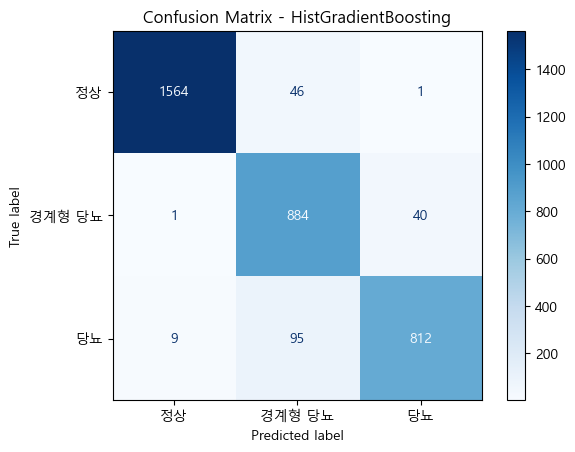


üìå XGBoost Classification Report:

              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.99      0.97      0.98      1611
      Í≤ΩÍ≥ÑÌòï ÎãπÎá®       0.86      0.94      0.90       925
          ÎãπÎá®       0.94      0.89      0.92       916

    accuracy                           0.94      3452
   macro avg       0.93      0.93      0.93      3452
weighted avg       0.94      0.94      0.94      3452



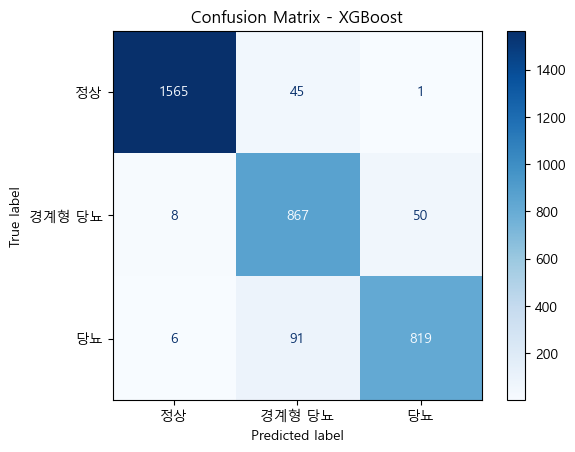


üìå RandomForest Classification Report:

              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.99      0.97      0.98      1611
      Í≤ΩÍ≥ÑÌòï ÎãπÎá®       0.86      0.95      0.90       925
          ÎãπÎá®       0.95      0.89      0.92       916

    accuracy                           0.94      3452
   macro avg       0.94      0.94      0.94      3452
weighted avg       0.95      0.94      0.94      3452



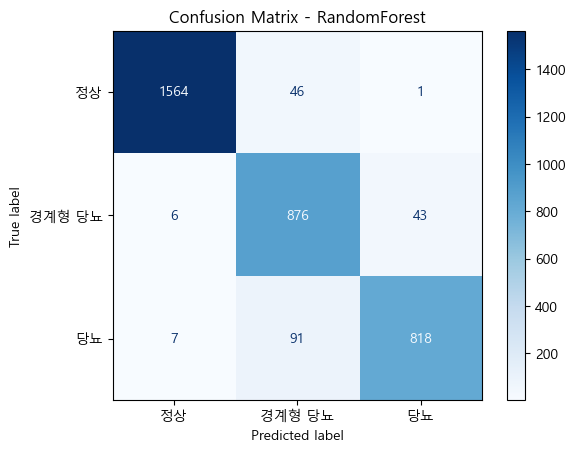

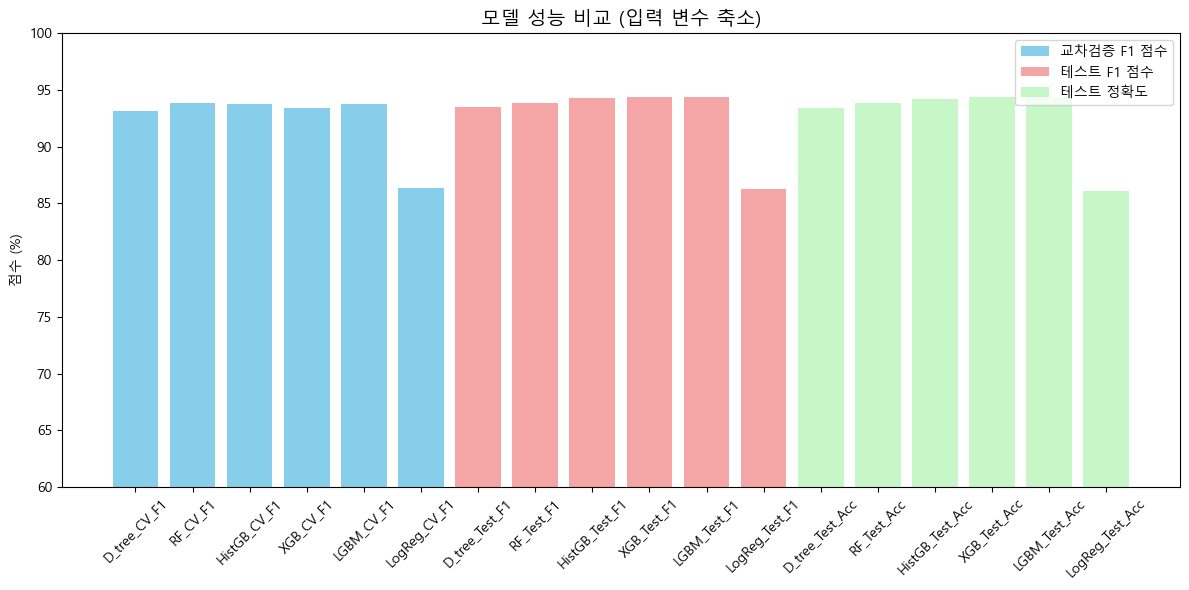

  0%|          | 0/100 [00:00<?, ?it/s]

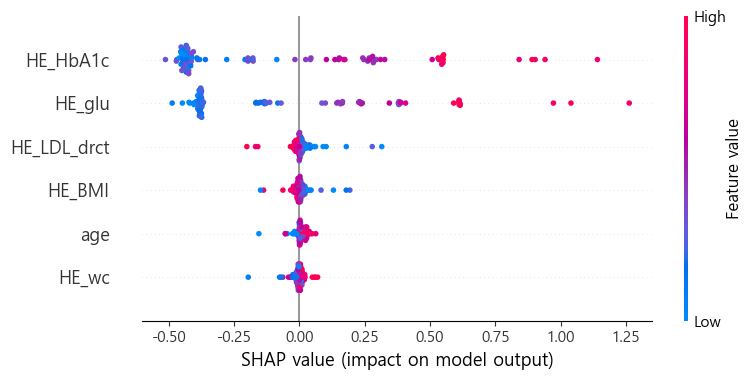

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# üéØ ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÏôÄ ÌÉÄÍ≤ü
features = ['HE_glu(Í≥µÎ≥µÌòàÎãπ)','HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)', 'HE_wc(ÌóàÎ¶¨ÎëòÎ†à)', 'HE_BMI', 'HE_LDL_drct(LDLÏΩúÎ†àÏä§ÌÖåÎ°§)', 'age']
X = data[features]
y = data['HE_DM_HbA1c(ÎãπÎá®Î≥ëÏú†Î¨¥)'].astype(int) - 1  # 0: Ï†ïÏÉÅ, 1: Í≤ΩÍ≥ÑÌòï, 2: ÎãπÎá®

# ‚öôÔ∏è ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# üîß Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# üì¶ Î™®Îç∏ Ï†ïÏùò
models = {
    "HistGradientBoosting": HistGradientBoostingClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False,
                             eval_metric='mlogloss', scale_pos_weight=1, random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# üîç Î™®Îç∏ ÌõàÎ†® & ÌèâÍ∞Ä
for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    print(f"\nüìå {name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['Ï†ïÏÉÅ', 'Í≤ΩÍ≥ÑÌòï ÎãπÎá®', 'ÎãπÎá®']))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ï†ïÏÉÅ', 'Í≤ΩÍ≥ÑÌòï ÎãπÎá®', 'ÎãπÎá®'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ÏÑ±Îä• Î∞î Ï∞®Ìä∏ (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÏûÖÎ†• Î≥ÄÏàò Ï∂ïÏÜå)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# ‚úÖ SHAP Ìï¥ÏÑù (KernelExplainer ÏÇ¨Ïö©)
# HistGradientBoosting Í∏∞Ï§Ä Ìï¥ÏÑù
explainer = shap.KernelExplainer(models["HistGradientBoosting"].predict, X_train_scaled[:100])  # 100Í∞úÎßå Ï∂îÏ∂úÎ°ú ÏÜçÎèÑ Í∞úÏÑ†
shap_values = explainer.shap_values(X_test_scaled[:100])

# ÏãúÍ∞ÅÌôî
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=features)


| ÌîºÏ≤òÎ™Ö                         | ÏòÅÌñ•ÎèÑ     | Ìï¥ÏÑù ÏöîÏïΩ         |
| --------------------------- | ------- | ------------- |
| **HE\_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)**     |  Îß§Ïö∞ ÌÅº | ÎÜíÏùÑÏàòÎ°ù ÎãπÎá® ÏòàÏ∏° ‚Üë  |
| **HE\_glu(Í≥µÎ≥µÌòàÎãπ)**         |  Îß§Ïö∞ ÌÅº | ÎÜíÏùÑÏàòÎ°ù ÎãπÎá® ÏòàÏ∏° ‚Üë  |
| **age(ÎÇòÏù¥)**                |  Ï§ëÍ∞Ñ   | Îã§ÏÜå ÏòÅÌñ• ÏûàÏùå      |
| **HE\_LDL\_drct(ÏΩúÎ†àÏä§ÌÖåÎ°§)** |  Ï§ëÍ∞Ñ   | ÎÇÆÏùÑÏàòÎ°ù ÎãπÎá® ÏïÑÎãò Ï∂îÎ°† |
| **HE\_wc / BMI**             |  ÎÇÆÏùå   | ÏòàÏ∏° ÏòÅÌñ• ÏûëÏùå      |

              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.99      0.97      0.98      1611
      Í≤ΩÍ≥ÑÌòï ÎãπÎá®       0.86      0.95      0.90       925
          ÎãπÎá®       0.94      0.89      0.92       916

    accuracy                           0.94      3452
   macro avg       0.93      0.93      0.93      3452
weighted avg       0.94      0.94      0.94      3452

=== ÎãπÎá®Î≥ë Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ===

--- ÌõàÎ†® ÏÑ∏Ìä∏ ÏÑ±Îä• ---
ÌõàÎ†® Ï†ïÌôïÎèÑ: 97.1%
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       1.00      0.98      0.99      6445
      Í≤ΩÍ≥ÑÌòï ÎãπÎá®       0.92      0.98      0.95      3698
          ÎãπÎá®       0.98      0.94      0.96      3664

    accuracy                           0.97     13807
   macro avg       0.97      0.97      0.97     13807
weighted avg       0.97      0.97      0.97     13807


--- ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• ---
ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 94.2%
              precision    recall  f1-score   sup

<Figure size 600x600 with 0 Axes>

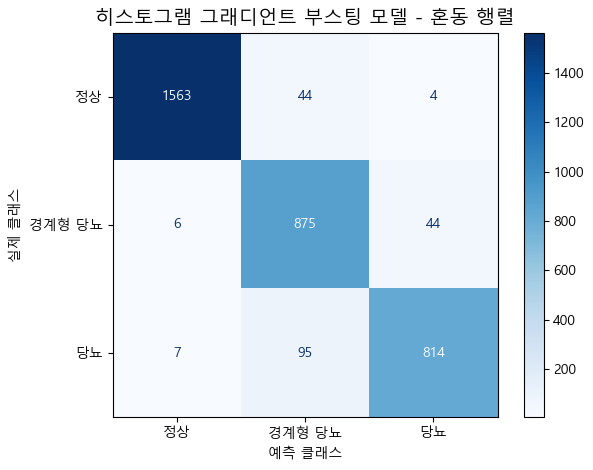

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_DM_HbA1c_input_features = ['HE_glu','HE_HbA1c', 'HE_wc', 'HE_BMI', 'HE_LDL_drct', 'age']

# XÏôÄ y Ï†ïÏùò
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÌïúÍ∏ÄÎ°ú Ï†ïÏùò
target_names_kor = ['Ï†ïÏÉÅ', 'Í≤ΩÍ≥ÑÌòï ÎãπÎá®', 'ÎãπÎá®']

# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†• (ÌïúÍ∏Ä ÌÅ¥ÎûòÏä§Î™Ö)
print(classification_report(y_test, y_pred, target_names=target_names_kor))

print("=== ÎãπÎá®Î≥ë Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ===")

# ÌõàÎ†® ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä
y_train_pred = best_model.predict(X_train_scaled) # SMOTE Ï†ÅÏö© Ï†ÑÏùò Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
print("\n--- ÌõàÎ†® ÏÑ∏Ìä∏ ÏÑ±Îä• ---")
print(f"ÌõàÎ†® Ï†ïÌôïÎèÑ: {train_accuracy:.1f}%")
print(classification_report(y_train, y_train_pred, target_names=target_names_kor))

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred) * 100
print("\n--- ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• ---")
print(f"ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_accuracy:.1f}%")
print(classification_report(y_test, y_pred, target_names=target_names_kor))

# ÌõàÎ†® vs ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ ÎπÑÍµê
print("\n--- ÌõàÎ†®/ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ ÎπÑÍµê ---")
print(f"ÌõàÎ†® Ï†ïÌôïÎèÑ: {train_accuracy:.1f}%")
print(f"ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_accuracy:.1f}%")
accuracy_diff = train_accuracy - test_accuracy
print(f"Ï†ïÌôïÎèÑ Ï∞®Ïù¥ (ÌõàÎ†® - ÌÖåÏä§Ìä∏): {accuracy_diff:.1f}p")
if accuracy_diff > 5: # ÏûÑÏùòÏùò Í∏∞Ï§Ä, ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†à
    print("-> ÌõàÎ†® Ï†ïÌôïÎèÑÍ∞Ä ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑÎ≥¥Îã§ ÌòÑÏ†ÄÌûà ÎÜíÏúºÎØÄÎ°ú Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.")
elif accuracy_diff < -5:
    print("-> ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑÍ∞Ä ÌõàÎ†® Ï†ïÌôïÎèÑÎ≥¥Îã§ ÌòÑÏ†ÄÌûà ÎÜíÏïÑ Ïù¥ÏÉÅ ÏßïÌõÑÏùº Ïàò ÏûàÏäµÎãàÎã§ (Îç∞Ïù¥ÌÑ∞ Ïú†Ï∂ú Îì± ÌôïÏù∏ ÌïÑÏöî).")
else:
    print("-> ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ Ï∞®Ïù¥Í∞Ä ÌÅ¨ÏßÄ ÏïäÏïÑ Í≥ºÏ†ÅÌï©Ïù¥ ÏïÑÎãê Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§.")


# ÌèâÍ∞Ä ÏßÄÌëú Î∞è ÌòºÎèôÌñâÎ†¨
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names_kor)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ Î™®Îç∏ - ÌòºÎèô ÌñâÎ†¨", fontsize=14)
plt.xlabel("ÏòàÏ∏° ÌÅ¥ÎûòÏä§")
plt.ylabel("Ïã§Ï†ú ÌÅ¥ÎûòÏä§")
plt.tight_layout()
plt.show()

# classification_report DataFrame Î≥ÄÌôò (ÏÑ†ÌÉù)
class_report = classification_report(y_test, y_pred, target_names=target_names_kor, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()



In [ ]:
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'HE_HbA1c'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data


print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:")
print(data.isnull().sum())
print("\nÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(data.describe())

# Ï†ÑÏ≤òÎ¶¨ ÏΩîÎìú ÎÅùÏóê Ï∂îÍ∞Ä
data.to_csv("ÏµúÏ¢Ö_Í±¥Í∞ïÍ≤ÄÏßÑ_Îç∞Ïù¥ÌÑ∞ÏÖã(Í∞ÄÍ≥µÎêú).csv", index=False, encoding='utf-8-sig')

Median for HE_wt: 62.9
Median for HE_ht: 162.7
Median for HE_BMI: 23.87374380540307
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_HbA1c          0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
DE1_pt            0
DI1_pt            0
HE_BMI_imputed    0
dtype: int64

ÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:

HE_DM_HbA1c:
HE_DM_HbA1c
1.0    0.466810
2.0    0.268018
3.0    0.265172
Name: proportion, dtype: float64

HE_obe:
HE_obe
2.0    0.360822
4.0    0.291829
3.0    0.222835
5.0    0.054010
1.0    0.046518
6.0    0.023985
Name: proportion, dtype: float64

HE_HP:
HE_HP
1.0  

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Îã§Ï§ë ÌÅ¥ÎûòÏä§ (0: Ï†ïÏÉÅ, 1: Í≤ΩÍ≥ÑÌòï, 2: ÎãπÎá®) ‚Üí One-vs-RestÏö© Ïù¥ÏßÑ Îß§Ìä∏Î¶≠Ïä§Î°ú Î≥ÄÌôò
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_proba = best_model.predict_proba(X_test_scaled)

# ROC AUC Score Í≥ÑÏÇ∞ (macro)
roc_auc_macro = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print(f"Macro ROC AUC Score: {roc_auc_macro:.4f}")


Macro ROC AUC Score: 0.9896


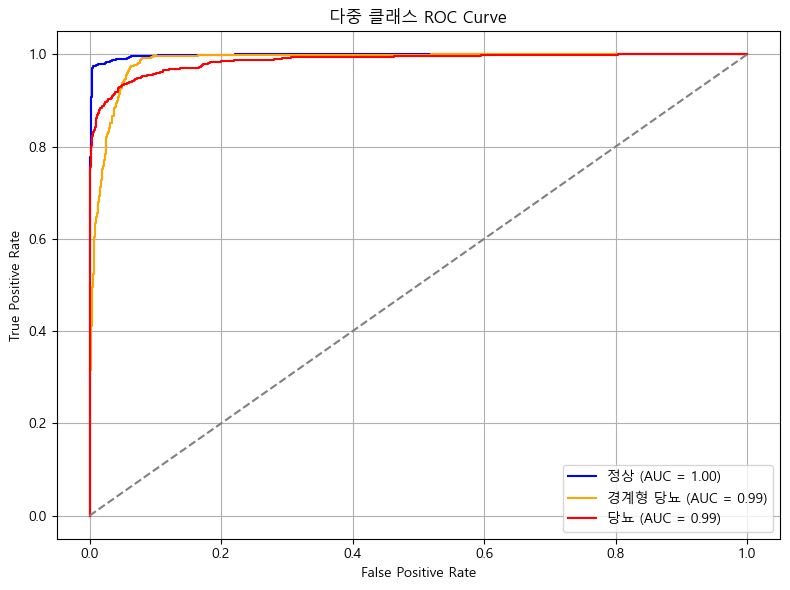

In [50]:
# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÌïúÍ∏Ä
class_names = ['Ï†ïÏÉÅ', 'Í≤ΩÍ≥ÑÌòï ÎãπÎá®', 'ÎãπÎá®']
colors = ['blue', 'orange', 'red']

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc(fpr, tpr):.2f})", color=colors[i])

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Îã§Ï§ë ÌÅ¥ÎûòÏä§ ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features(Í≥†ÌòàÏïï ÏûÖÎ†•Í∞í)= ['age','HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 
                                'HE_BMI', 'HE_chol', 'HE_LDL_drct', 'HE_HbA1c']

# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='Cross-Validation F1')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='Test F1', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='Test Accuracy', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Score (%)')
plt.title('Model Comparison with Reduced Features')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Score (%)')
ax.set_title('Model F1 Score Distribution (Cross-Validation)')
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (4068120221.py, line 14)

**Îã§Ï§ëÎ™®Îç∏ÎπÑÍµê(Í≥†ÌòàÏïï)**


üìå HistGradientBoosting Classification Report:

              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.88      0.83      0.85      1163
        Ï£ºÏùòÌòàÏïï       0.67      0.75      0.71       635
      Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ       0.71      0.70      0.71       931
         Í≥†ÌòàÏïï       0.66      0.65      0.65       723

    accuracy                           0.74      3452
   macro avg       0.73      0.73      0.73      3452
weighted avg       0.75      0.74      0.74      3452



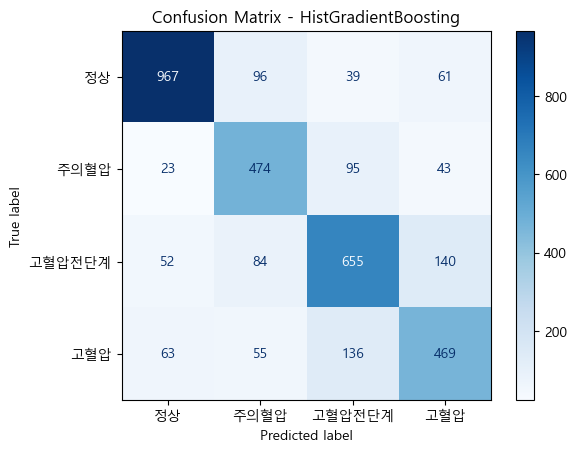


üìå XGBoost Classification Report:

              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.84      0.86      0.85      1163
        Ï£ºÏùòÌòàÏïï       0.70      0.71      0.71       635
      Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ       0.69      0.73      0.71       931
         Í≥†ÌòàÏïï       0.67      0.59      0.63       723

    accuracy                           0.74      3452
   macro avg       0.73      0.72      0.72      3452
weighted avg       0.74      0.74      0.74      3452



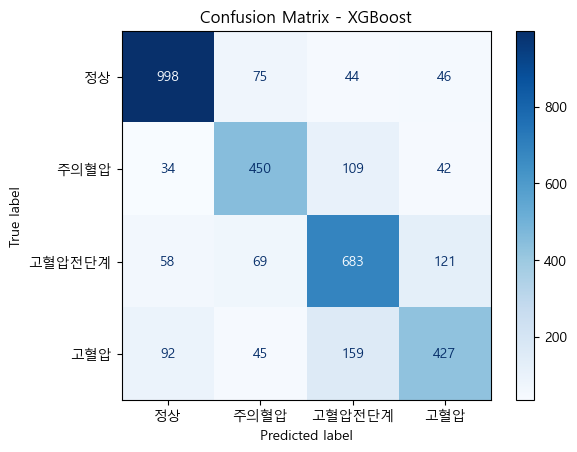


üìå RandomForest Classification Report:

              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.85      0.86      0.85      1163
        Ï£ºÏùòÌòàÏïï       0.69      0.72      0.70       635
      Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ       0.68      0.74      0.71       931
         Í≥†ÌòàÏïï       0.67      0.56      0.61       723

    accuracy                           0.74      3452
   macro avg       0.72      0.72      0.72      3452
weighted avg       0.74      0.74      0.74      3452



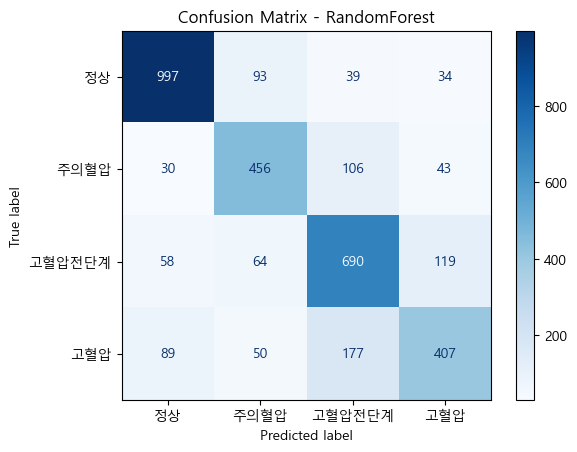

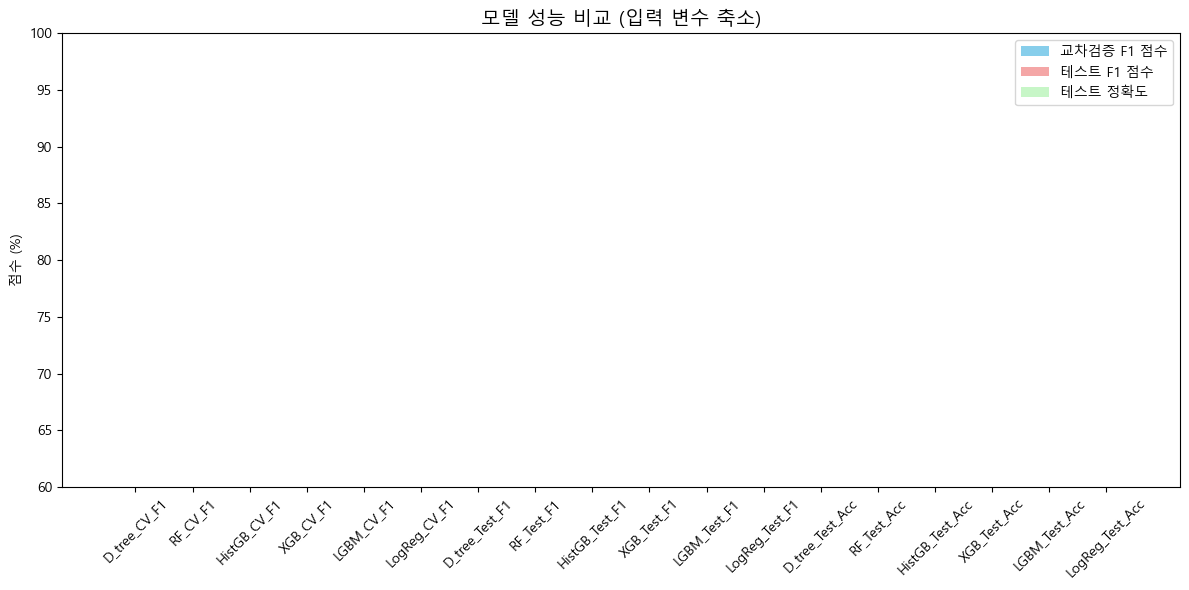

  0%|          | 0/100 [00:00<?, ?it/s]

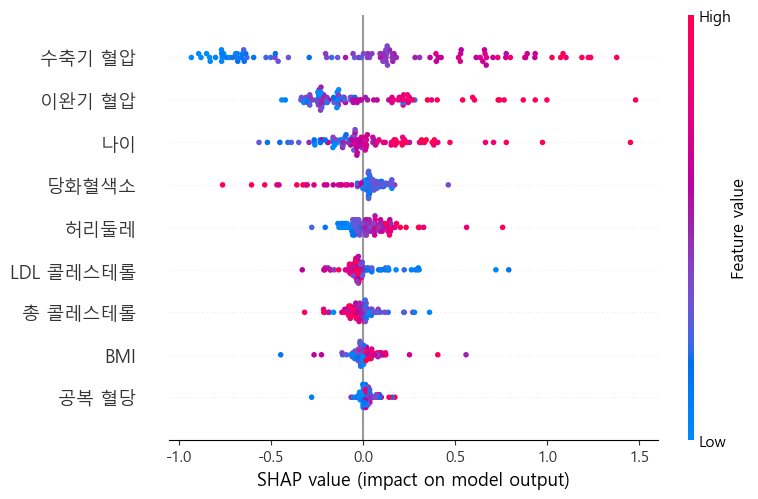

In [178]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# üéØ ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÏôÄ ÌÉÄÍ≤ü
features= ['age','HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_chol', 'HE_LDL_drct', 'HE_HbA1c']
X = data[features]
y = data['HE_HP'].astype(int) - 1  # 0: Ï†ïÏÉÅ, 1: Í≤ΩÍ≥ÑÌòï, 2: ÎãπÎá®

# ‚öôÔ∏è ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# üîß Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# üì¶ Î™®Îç∏ Ï†ïÏùò
models = {
    "HistGradientBoosting": HistGradientBoostingClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False,
                             eval_metric='mlogloss', scale_pos_weight=1, random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# üîç Î™®Îç∏ ÌõàÎ†® & ÌèâÍ∞Ä
for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    print(f"\nüìå {name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['Ï†ïÏÉÅ', 'Ï£ºÏùòÌòàÏïï', 'Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ï†ïÏÉÅ', 'Ï£ºÏùòÌòàÏïï', 'Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# ÏÑ±Îä• Î∞î Ï∞®Ìä∏ (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÏûÖÎ†• Î≥ÄÏàò Ï∂ïÏÜå)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

korean_features = [
    'ÎÇòÏù¥', 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï', 'ÌóàÎ¶¨ÎëòÎ†à', 'Í≥µÎ≥µ ÌòàÎãπ', 'BMI',
    'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'ÎãπÌôîÌòàÏÉâÏÜå'
]

# ‚úÖ SHAP Ìï¥ÏÑù (KernelExplainer ÏÇ¨Ïö©)
# HistGradientBoosting Í∏∞Ï§Ä Ìï¥ÏÑù
explainer = shap.KernelExplainer(models["HistGradientBoosting"].predict, X_train_scaled[:100])  # 100Í∞úÎßå Ï∂îÏ∂úÎ°ú ÏÜçÎèÑ Í∞úÏÑ†
shap_values = explainer.shap_values(X_test_scaled[:100])

# ÏãúÍ∞ÅÌôî
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=korean_features)



| ÌîºÏ≤òÎ™Ö                       | ÏòÅÌñ•ÎèÑ  | Ìï¥ÏÑù ÏöîÏïΩ            |
| ------------------------- | ---- | ---------------- |
| `HE_sbp1 (ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)`        | Îß§Ïö∞ ÌÅº | ÎÜíÏùÑÏàòÎ°ù Í≥†ÌòàÏïï ÏòàÏ∏° ‚Üë    |
| `HE_dbp1 (Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)`        | Îß§Ïö∞ ÌÅº | ÎÜíÏùÑÏàòÎ°ù Í≥†ÌòàÏïï ÏòàÏ∏° ‚Üë    |
| `age (ÎÇòÏù¥)`                | Ï§ëÍ∞Ñ   | Í≥†Î†πÏùºÏàòÎ°ù Í≥†ÌòàÏïï ÏòàÏ∏° ‚Üë   |
| `HE_HbA1c (ÎãπÌôîÌòàÏÉâÏÜå)`        | Ï§ëÍ∞Ñ   | ÎÜíÏùÑÏàòÎ°ù Í≥†ÌòàÏïï ÏòàÏ∏° ÏïΩÍ∞Ñ ‚Üë |
| `HE_wc (ÌóàÎ¶¨ÎëòÎ†à)`            | ÎÇÆÏùå   | ÏòàÏ∏° ÏòÅÌñ• ÏûëÏùå         |
| `HE_LDL_drct (LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)` | ÎÇÆÏùå   | ÎÇÆÏùÑÏàòÎ°ù Í≥†ÌòàÏïï ÏïÑÎãò Í∞ÄÎä• ‚Üë |
| `HE_chol (Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)`       | ÎÇÆÏùå   | ÏòàÏ∏° ÏòÅÌñ• ÏûëÏùå         |
| `HE_BMI (Ï≤¥ÏßàÎüâÏßÄÏàò)`          | ÎÇÆÏùå   | ÏòàÏ∏° ÏòÅÌñ• ÏûëÏùå         |
| `HE_glu (Í≥µÎ≥µ ÌòàÎãπ)`          | ÎÇÆÏùå   | ÏòàÏ∏° ÏòÅÌñ• ÏûëÏùå         |


In [ ]:
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'HE_HbA1c'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data


print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:")
print(data.isnull().sum())
print("\nÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(data.describe())

# Ï†ÑÏ≤òÎ¶¨ ÏΩîÎìú ÎÅùÏóê Ï∂îÍ∞Ä
data.to_csv("ÏµúÏ¢Ö_Í±¥Í∞ïÍ≤ÄÏßÑ_Îç∞Ïù¥ÌÑ∞ÏÖã(Í∞ÄÍ≥µÎêú).csv", index=False, encoding='utf-8-sig')

Median for HE_wt: 62.9
Median for HE_ht: 162.7
Median for HE_BMI: 23.87374380540307
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_HbA1c          0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
DE1_pt            0
DI1_pt            0
HE_BMI_imputed    0
dtype: int64

ÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:

HE_DM_HbA1c:
HE_DM_HbA1c
1.0    0.466810
2.0    0.268018
3.0    0.265172
Name: proportion, dtype: float64

HE_obe:
HE_obe
2.0    0.360822
4.0    0.291829
3.0    0.222835
5.0    0.054010
1.0    0.046518
6.0    0.023985
Name: proportion, dtype: float64

HE_HP:
HE_HP
1.0  


--- HistGradientBoosting Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ ---
              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.87      0.84      0.85      1163
       Ï£ºÏùò ÌòàÏïï       0.68      0.74      0.71       635
     Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ       0.70      0.72      0.71       931
         Í≥†ÌòàÏïï       0.64      0.61      0.63       723

    accuracy                           0.74      3452
   macro avg       0.72      0.73      0.72      3452
weighted avg       0.74      0.74      0.74      3452



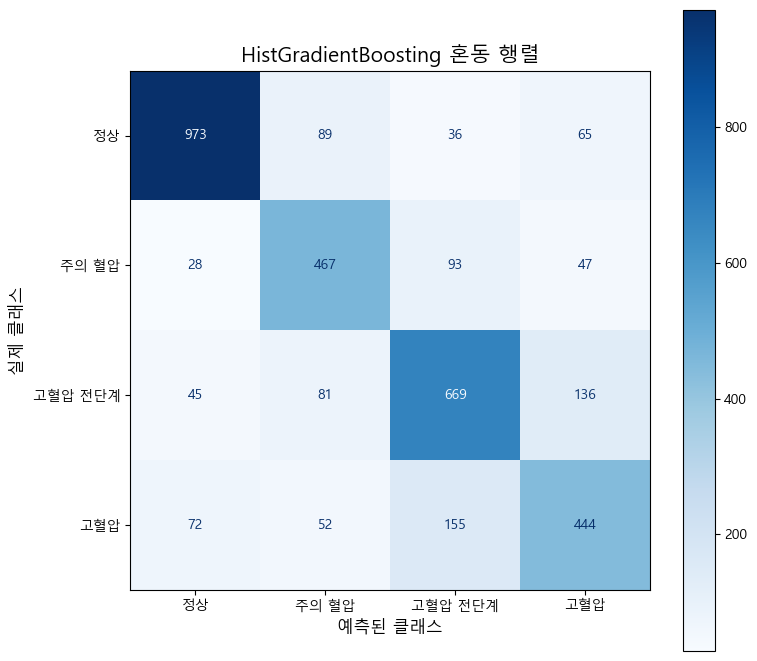

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Ìè∞Ìä∏ ÏÑ§Ï†ï (ÎÇòÎàîÍ≥†Îîï ÎòêÎäî ÏãúÏä§ÌÖúÏóê ÏÑ§ÏπòÎêú ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî)
# ÏòàÏãú: 'NanumGothic.ttf' ÎòêÎäî '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
try:
    fm.fontManager.addfont('C:/Windows/Fonts/malgun.ttf') # Windows ÏÇ¨Ïö©Ïûê
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ
except:
    print("ÎßëÏùÄ Í≥†Îîï Ìè∞Ìä∏Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Îã§Î•∏ ÌïúÍ∏Ä Ìè∞Ìä∏Î•º ÏÑ§Ï†ïÌïòÍ±∞ÎÇò ÏÑ§ÏπòÌïòÏÑ∏Ïöî.")



# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features= ['age(ÎÇòÏù¥)','HE_sbp1(ÏàòÏ∂ïÍ∏∞ÌòàÏïï)', 'HE_dbp1(Ïù¥ÏôÑÍ∏∞ÌòàÏïï)',  'HE_wc(ÌóàÎ¶¨ÎëòÎ†à)', 'HE_glu(Í≥µÎ≥µÌòàÎãπ)', 
                       'HE_BMI', 'HE_chol(Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§)', 'HE_LDL_drct(LDLÏΩúÎ†àÏä§ÌÖåÎ°§)', 'HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)']

# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1 # 0:Ï†ïÏÉÅ, 1:Í≤ΩÍ≥ÑÌòï, 2:ÎãπÎá® (ÏΩîÎìúÏÉÅ 3Îã®Í≥ÑÎ°úÎßå Î∂ÑÎ•òÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú, target_namesÎ•º 3Í∞úÎ°ú ÎßûÏ∂•ÎãàÎã§.)

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test) # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©

# SMOTE Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# HistGradientBoostingClassifierÎ°ú Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Ï†ïÏùò (y=data['HE_HP'].astype(int) - 1 Ïóê Îî∞Îùº 0, 1, 2)
# 'HE_HP'Í∞Ä 1, 2, 3ÏúºÎ°ú ÎÇòÎâòÏñ¥ ÏûàÎã§Î©¥, -1ÏùÑ ÌïòÎ©¥ 0, 1, 2Í∞Ä Îê©ÎãàÎã§.
# Îî∞ÎùºÏÑú target_namesÎäî 3Í∞úÏó¨Ïïº Ìï©ÎãàÎã§.
class_names_korean = ['Ï†ïÏÉÅ', 'Ï£ºÏùò ÌòàÏïï', 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']


# Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ Ï∂úÎ†• (ÌïúÍ∏Ä ÌÉÄÍ≤ü Ïù¥Î¶Ñ Ï†ÅÏö©)
print("\n--- HistGradientBoosting Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ ---")
print(classification_report(y_test, y_pred, target_names=class_names_korean))

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî (ÌïúÍ∏Ä ÎùºÎ≤® Ï†ÅÏö©)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 7)) # ÌîåÎ°Ø ÏÇ¨Ïù¥Ï¶à Ï°∞Ï†ï
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names_korean)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca()) # ax=plt.gca()Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌòÑÏû¨ figureÏóê ÌîåÎ°Ø
plt.title("HistGradientBoosting ÌòºÎèô ÌñâÎ†¨", fontsize=15)
plt.xlabel("ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§", fontsize=12) # XÏ∂ï ÎùºÎ≤® ÌïúÍ∏ÄÌôî
plt.ylabel("Ïã§Ï†ú ÌÅ¥ÎûòÏä§", fontsize=12) # YÏ∂ï ÎùºÎ≤® ÌïúÍ∏ÄÌôî
plt.tight_layout()
plt.show()

smote Ï†Ñ ÌõÑ ÏãúÍ∞ÅÌôî

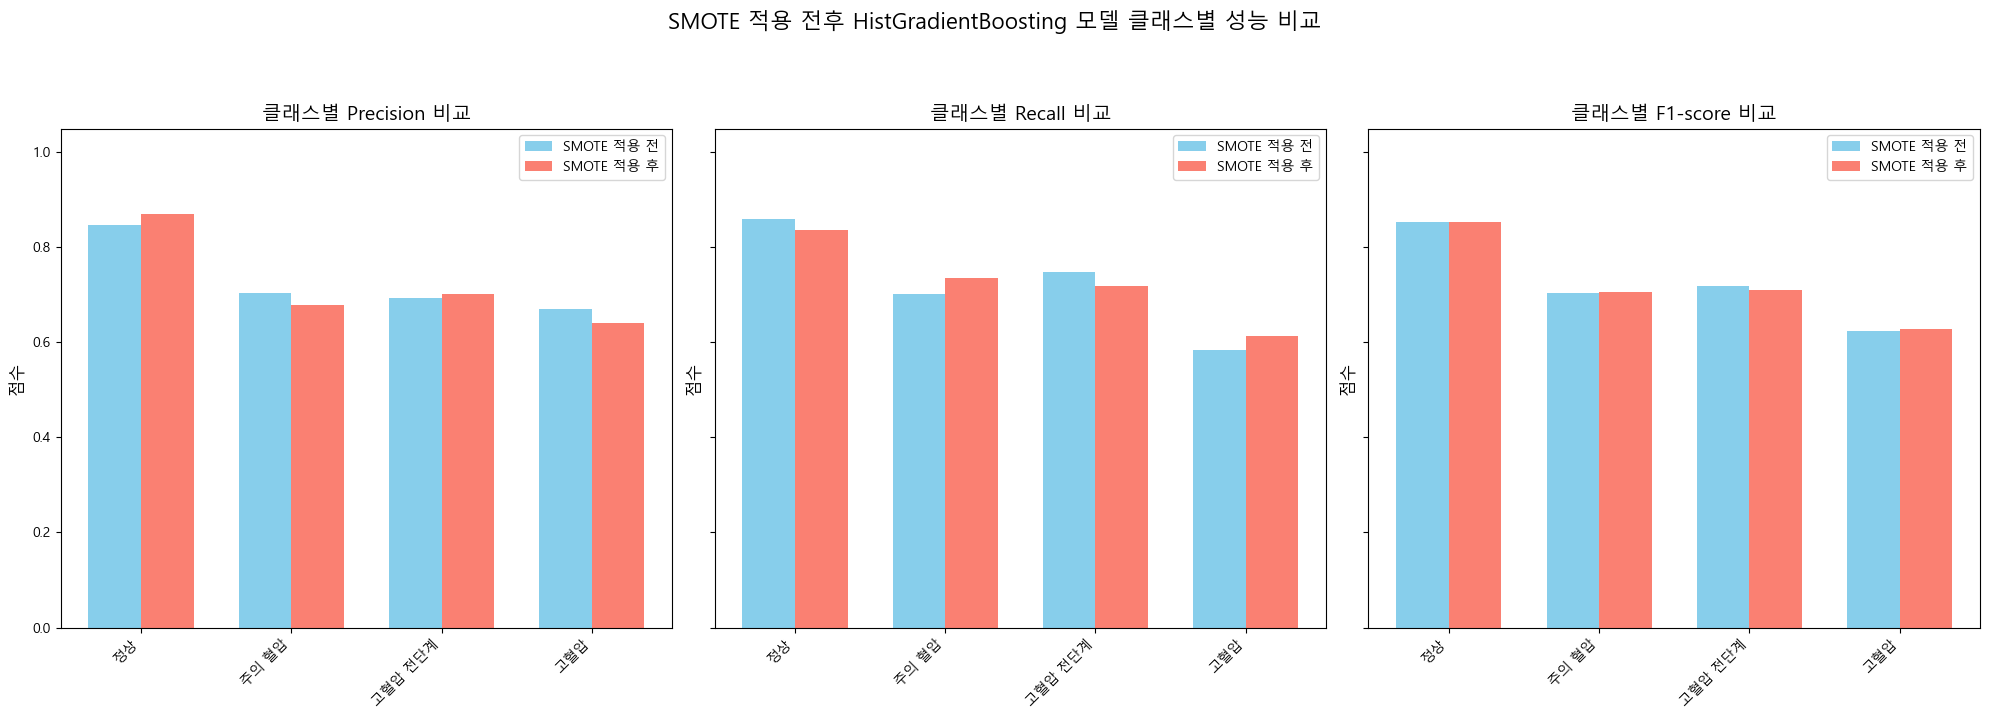

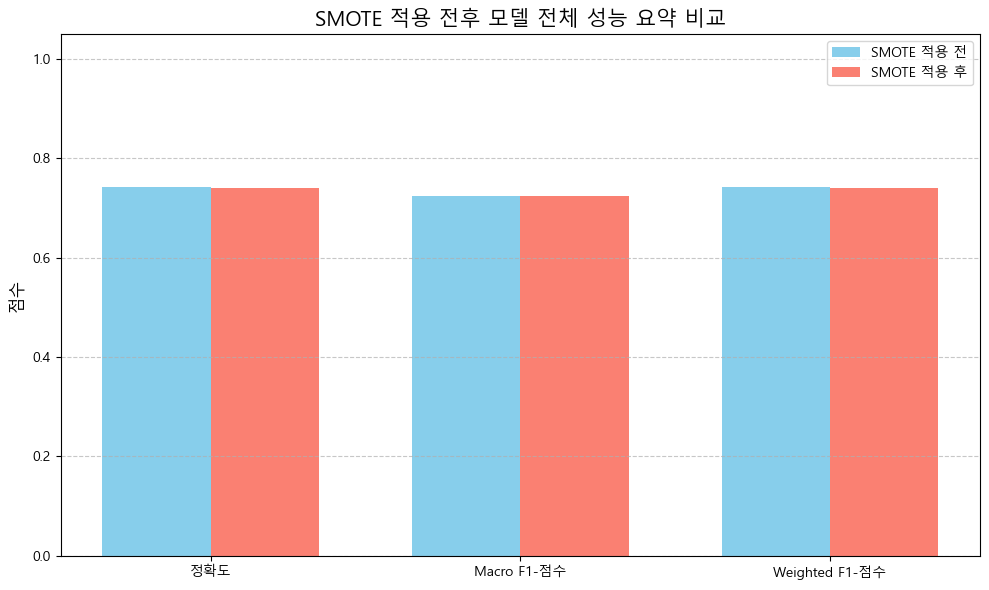

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features = ['age','HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu', 'HE_BMI', 'HE_chol', 'HE_LDL_drct', 'HE_HbA1c']

# XÏôÄ y Ï†ïÏùò (0:Ï†ïÏÉÅ, 1:Í≤ΩÍ≥ÑÌòï, 2:ÎãπÎá®)
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1
class_names_korean = ['Ï†ïÏÉÅ', 'Ï£ºÏùò ÌòàÏïï', 'Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SMOTE Ï†ÅÏö© Ï†Ñ Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---
model_before_smote = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model_before_smote.fit(X_train_scaled, y_train)
y_pred_before_smote = model_before_smote.predict(X_test_scaled)
report_before_smote = classification_report(y_test, y_pred_before_smote, target_names=class_names_korean, output_dict=True)

# --- SMOTE Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
model_after_smote = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model_after_smote.fit(X_train_smote, y_train_smote)
y_pred_after_smote = model_after_smote.predict(X_test_scaled)
report_after_smote = classification_report(y_test, y_pred_after_smote, target_names=class_names_korean, output_dict=True)


# --- SMOTE Ï†ÅÏö© Ï†ÑÌõÑ ÏÑ±Îä• ÏßÄÌëú ÎπÑÍµê ÏãúÍ∞ÅÌôî (ÎßâÎåÄ Í∑∏ÎûòÌîÑ) ---

# 1. Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ∞ÄÎèÑ(Precision), Ïû¨ÌòÑÏú®(Recall), F1-Ï†êÏàò(F1-Score) ÎπÑÍµê
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True) # 3Í∞úÏùò ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±, YÏ∂ï Í≥µÏú†

metrics_to_plot = ['precision', 'recall', 'f1-score']
colors = ['skyblue', 'salmon'] # SMOTE Ï†ÅÏö© Ï†Ñ, SMOTE Ï†ÅÏö© ÌõÑ

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    # Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ 'SMOTE Ï†ÅÏö© Ï†Ñ'Ïùò ÏßÄÌëú Í∞í Ï∂îÏ∂ú
    before_values = [report_before_smote[c][metric] for c in class_names_korean]
    # Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ 'SMOTE Ï†ÅÏö© ÌõÑ'Ïùò ÏßÄÌëú Í∞í Ï∂îÏ∂ú
    after_values = [report_after_smote[c][metric] for c in class_names_korean]

    x = np.arange(len(class_names_korean)) # Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú XÏ∂ï ÏúÑÏπò
    width = 0.35 # ÎßâÎåÄ ÎÑàÎπÑ

    # 'SMOTE Ï†ÅÏö© Ï†Ñ' ÎßâÎåÄ
    rects1 = ax.bar(x - width/2, before_values, width, label='SMOTE Ï†ÅÏö© Ï†Ñ', color=colors[0])
    # 'SMOTE Ï†ÅÏö© ÌõÑ' ÎßâÎåÄ
    rects2 = ax.bar(x + width/2, after_values, width, label='SMOTE Ï†ÅÏö© ÌõÑ', color=colors[1])

    ax.set_title(f'ÌÅ¥ÎûòÏä§Î≥Ñ {metric.capitalize()} ÎπÑÍµê', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(class_names_korean, rotation=45, ha='right') # ÌÅ¥ÎûòÏä§ ÎùºÎ≤® ÌöåÏ†Ñ
    ax.set_ylabel('Ï†êÏàò', fontsize=12)
    ax.legend(fontsize=10)
    ax.set_ylim(0, 1.05) # YÏ∂ï Î≤îÏúÑ (0ÏóêÏÑú 100%ÍπåÏßÄ)

plt.suptitle('SMOTE Ï†ÅÏö© Ï†ÑÌõÑ HistGradientBoosting Î™®Îç∏ ÌÅ¥ÎûòÏä§Î≥Ñ ÏÑ±Îä• ÎπÑÍµê', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ï†ÑÏ≤¥ Ï†úÎ™©ÏùÑ ÏúÑÌïú Í≥µÍ∞Ñ ÌôïÎ≥¥
plt.show()

# 2. Ï†ÑÏ≤¥ Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ(Accuracy), Macro F1, Weighted F1 ÎπÑÍµê
overall_metrics_labels = ['Ï†ïÌôïÎèÑ', 'Macro F1-Ï†êÏàò', 'Weighted F1-Ï†êÏàò']
overall_metrics_before = [
    report_before_smote['accuracy'],
    report_before_smote['macro avg']['f1-score'],
    report_before_smote['weighted avg']['f1-score']
]
overall_metrics_after = [
    report_after_smote['accuracy'],
    report_after_smote['macro avg']['f1-score'],
    report_after_smote['weighted avg']['f1-score']
]

x = np.arange(len(overall_metrics_labels))
width = 0.35

plt.figure(figsize=(10, 6))
# 'SMOTE Ï†ÅÏö© Ï†Ñ' ÎßâÎåÄ
plt.bar(x - width/2, overall_metrics_before, width, label='SMOTE Ï†ÅÏö© Ï†Ñ', color='skyblue')
# 'SMOTE Ï†ÅÏö© ÌõÑ' ÎßâÎåÄ
plt.bar(x + width/2, overall_metrics_after, width, label='SMOTE Ï†ÅÏö© ÌõÑ', color='salmon')

plt.ylabel('Ï†êÏàò', fontsize=12)
plt.title('SMOTE Ï†ÅÏö© Ï†ÑÌõÑ Î™®Îç∏ Ï†ÑÏ≤¥ ÏÑ±Îä• ÏöîÏïΩ ÎπÑÍµê', fontsize=15)
plt.xticks(x, overall_metrics_labels, rotation=0)
plt.ylim(0, 1.05) # YÏ∂ï Î≤îÏúÑ (0ÏóêÏÑú 100%ÍπåÏßÄ)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) # YÏ∂ïÏóê Í∑∏Î¶¨Îìú ÎùºÏù∏ Ï∂îÍ∞Ä
plt.tight_layout()
plt.show()

# (ÏÑ†ÌÉù ÏÇ¨Ìï≠) ÌòºÎèô ÌñâÎ†¨ÎèÑ Í∞ÅÍ∞Å ÏãúÍ∞ÅÌôîÌïòÏó¨ ÎπÑÍµêÌïòÎäî Í≤ÉÎèÑ Ïó¨Ï†ÑÌûà Ïú†Ïö©Ìï©ÎãàÎã§.
# ÏúÑÏóê Ïù¥ÎØ∏ ÏΩîÎìúÍ∞Ä ÏûàÏúºÎØÄÎ°ú Ïó¨Í∏∞ÏÑúÎäî ÏÉùÎûµÌï©ÎãàÎã§.
# conf_matrix_before = confusion_matrix(y_test, y_pred_before_smote)
# disp_before = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_before, display_labels=class_names_korean)
# disp_before.plot(cmap=plt.cm.Blues)
# plt.title("SMOTE Ï†ÅÏö© Ï†Ñ ÌòºÎèô ÌñâÎ†¨")
# plt.show()

# conf_matrix_after = confusion_matrix(y_test, y_pred_after_smote)
# disp_after = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_after, display_labels=class_names_korean)
# disp_after.plot(cmap=plt.cm.Blues)
# plt.title("SMOTE Ï†ÅÏö© ÌõÑ ÌòºÎèô ÌñâÎ†¨")
# plt.show()

In [181]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Îã§Ï§ë ÌÅ¥ÎûòÏä§ (0: Ï†ïÏÉÅ, 1: Ï£ºÏùòÌòàÏïï, 2: Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ, 3:Í≥†ÌòàÏïï) ‚Üí One-vs-RestÏö© Ïù¥ÏßÑ Îß§Ìä∏Î¶≠Ïä§Î°ú Î≥ÄÌôò
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_proba = best_model.predict_proba(X_test_scaled)

# ROC AUC Score Í≥ÑÏÇ∞ (macro)
roc_auc_macro = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print(f"Macro ROC AUC Score: {roc_auc_macro:.4f}")


Macro ROC AUC Score: 0.9228


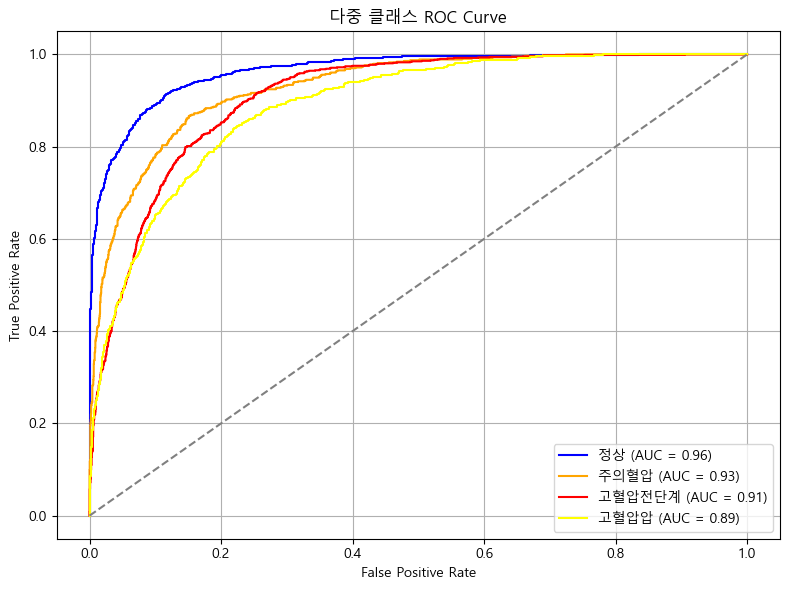

In [ ]:
# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÌïúÍ∏Ä
class_names = ['Ï†ïÏÉÅ', 'Ï£ºÏùòÌòàÏïï', 'Í≥†ÌòàÏïïÏ†ÑÎã®Í≥Ñ', 'Í≥†ÌòàÏïï']
colors = ['blue', 'orange', 'red', 'yellow']

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc(fpr, tpr):.2f})", color=colors[i])

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Îã§Ï§ë ÌÅ¥ÎûòÏä§ ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


‚ñ∂ Mean F1 score (CV) of D_tree: 58.29%
‚ñ∂ Test F1 score of D_tree: 56.43%
‚ñ∂ Test Accuracy of D_tree: 66.34%

‚ñ∂ Mean F1 score (CV) of RF: 97.02%
‚ñ∂ Test F1 score of RF: 97.19%
‚ñ∂ Test Accuracy of RF: 97.29%

‚ñ∂ Mean F1 score (CV) of HistGB: 99.23%
‚ñ∂ Test F1 score of HistGB: 97.90%
‚ñ∂ Test Accuracy of HistGB: 97.90%

‚ñ∂ Mean F1 score (CV) of XGB: 98.92%
‚ñ∂ Test F1 score of XGB: 98.98%
‚ñ∂ Test Accuracy of XGB: 98.98%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 10968, number of used features: 7
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightG

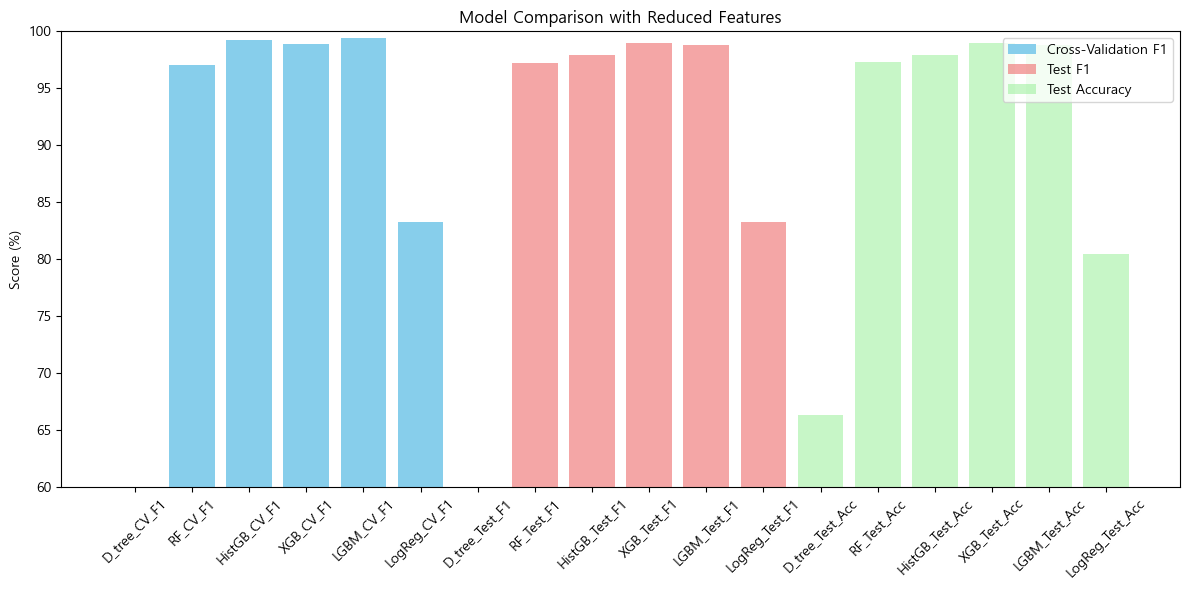

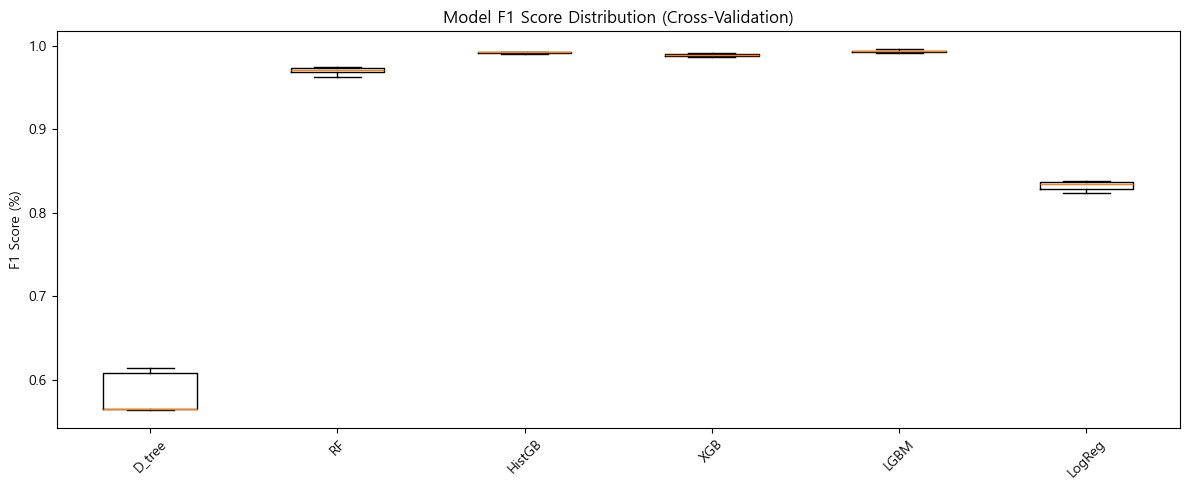

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_obe_input_features= ['age','HE_wc', 'HE_BMI',  'HE_wt', 'HE_alt', 'HE_HDL_st2', 'HE_TG']

# XÏôÄ y Ï†ïÏùò
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='Cross-Validation F1')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='Test F1', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='Test Accuracy', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Score (%)')
plt.title('Model Comparison with Reduced Features')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Score (%)')
ax.set_title('Model F1 Score Distribution (Cross-Validation)')
plt.tight_layout()
plt.show()



üìå HistGradientBoosting Classification Report:

              precision    recall  f1-score   support

         Ï†ÄÏ≤¥Ï§ë       1.00      1.00      1.00       161
        Ï†ïÏÉÅÏ≤¥Ï§ë       1.00      1.00      1.00      1246
         Í≥ºÏ≤¥Ï§ë       0.99      0.96      0.98       769
          ÎπÑÎßå       0.99      1.00      0.99      1007
        Í≥†ÎèÑÎπÑÎßå       0.96      0.99      0.98       186
      Ï¥àÍ≥†ÎèÑÎπÑÎßå        0.84      0.95      0.89        83

    accuracy                           0.99      3452
   macro avg       0.96      0.98      0.97      3452
weighted avg       0.99      0.99      0.99      3452



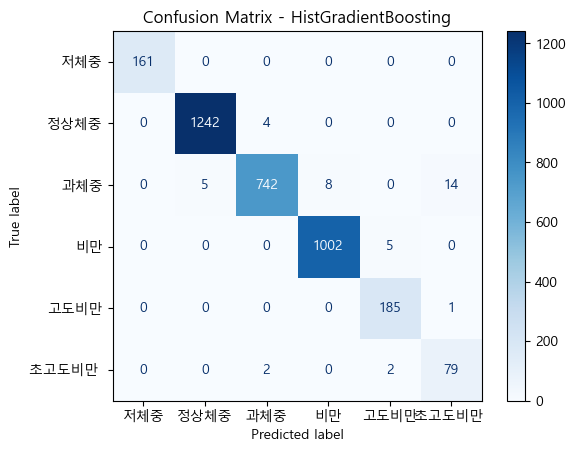


üìå XGBoost Classification Report:

              precision    recall  f1-score   support

         Ï†ÄÏ≤¥Ï§ë       1.00      1.00      1.00       161
        Ï†ïÏÉÅÏ≤¥Ï§ë       1.00      1.00      1.00      1246
         Í≥ºÏ≤¥Ï§ë       0.99      0.98      0.99       769
          ÎπÑÎßå       0.99      1.00      0.99      1007
        Í≥†ÎèÑÎπÑÎßå       0.97      0.99      0.98       186
      Ï¥àÍ≥†ÎèÑÎπÑÎßå        0.94      0.94      0.94        83

    accuracy                           0.99      3452
   macro avg       0.98      0.98      0.98      3452
weighted avg       0.99      0.99      0.99      3452



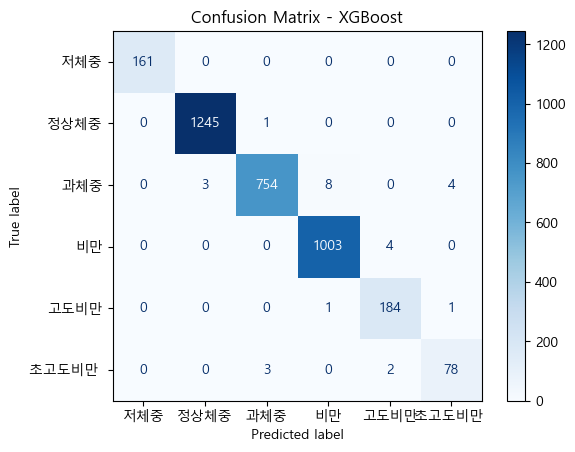


üìå RandomForest Classification Report:

              precision    recall  f1-score   support

         Ï†ÄÏ≤¥Ï§ë       1.00      1.00      1.00       161
        Ï†ïÏÉÅÏ≤¥Ï§ë       1.00      1.00      1.00      1246
         Í≥ºÏ≤¥Ï§ë       0.98      0.99      0.98       769
          ÎπÑÎßå       1.00      1.00      1.00      1007
        Í≥†ÎèÑÎπÑÎßå       0.98      0.99      0.99       186
      Ï¥àÍ≥†ÎèÑÎπÑÎßå        0.94      0.77      0.85        83

    accuracy                           0.99      3452
   macro avg       0.98      0.96      0.97      3452
weighted avg       0.99      0.99      0.99      3452



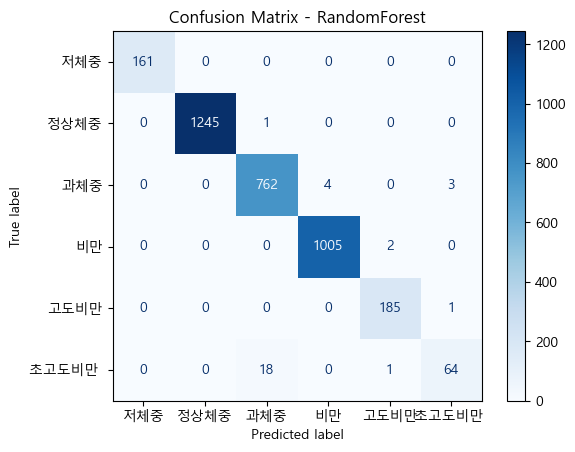

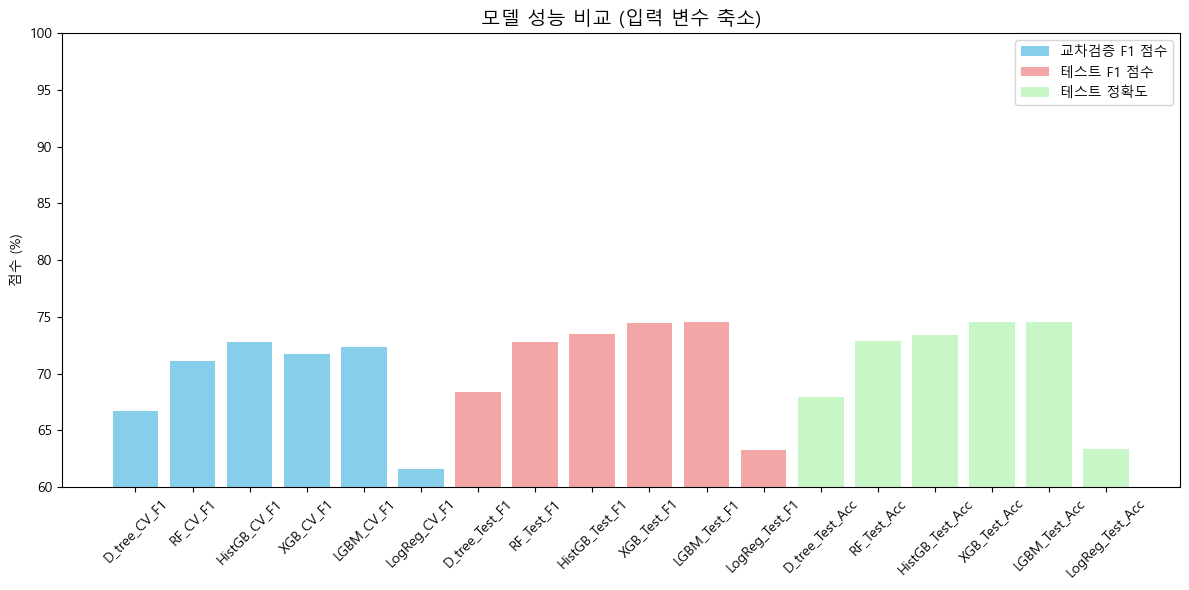

  0%|          | 0/100 [00:00<?, ?it/s]

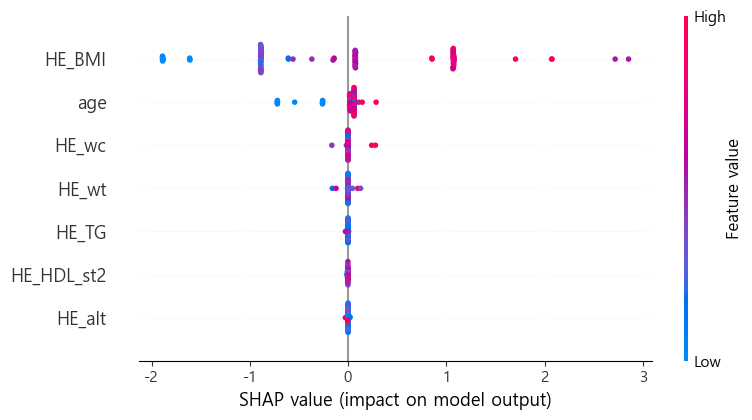

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# üéØ ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÏôÄ ÌÉÄÍ≤ü
features= ['age','HE_wc(ÌóàÎ¶¨ÎëòÎ†à)', 'HE_BMI',  'HE_wt(Î¨¥Í≤å)', 'HE_alt(Í∞ÑÍ∏∞Îä•alt)', 'HE_HDL_st2(HDLÏΩúÎ†àÏä§ÌÖåÎ°§)', 'HE_TG(Ï§ëÏÑ±ÏßÄÎ∞©)']
X = data[features]
y = data['HE_obe'].astype(int) - 1 

# ‚öôÔ∏è ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# üîß Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# üì¶ Î™®Îç∏ Ï†ïÏùò
models = {
    "HistGradientBoosting": HistGradientBoostingClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False,
                             eval_metric='mlogloss', scale_pos_weight=1, random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# üîç Î™®Îç∏ ÌõàÎ†® & ÌèâÍ∞Ä
for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    print(f"\nüìå {name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['Ï†ÄÏ≤¥Ï§ë', 'Ï†ïÏÉÅÏ≤¥Ï§ë', 'Í≥ºÏ≤¥Ï§ë', 'ÎπÑÎßå', 'Í≥†ÎèÑÎπÑÎßå', 'Ï¥àÍ≥†ÎèÑÎπÑÎßå ']))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ï†ÄÏ≤¥Ï§ë', 'Ï†ïÏÉÅÏ≤¥Ï§ë', 'Í≥ºÏ≤¥Ï§ë', 'ÎπÑÎßå', 'Í≥†ÎèÑÎπÑÎßå', 'Ï¥àÍ≥†ÎèÑÎπÑÎßå '])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# ÏÑ±Îä• Î∞î Ï∞®Ìä∏ (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÏûÖÎ†• Î≥ÄÏàò Ï∂ïÏÜå)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# ‚úÖ SHAP Ìï¥ÏÑù (KernelExplainer ÏÇ¨Ïö©)
# HistGradientBoosting Í∏∞Ï§Ä Ìï¥ÏÑù
explainer = shap.KernelExplainer(models["HistGradientBoosting"].predict, X_train_scaled[:100])  # 100Í∞úÎßå Ï∂îÏ∂úÎ°ú ÏÜçÎèÑ Í∞úÏÑ†
shap_values = explainer.shap_values(X_test_scaled[:100])

# ÏãúÍ∞ÅÌôî
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=features)


                 precision    recall  f1-score   support

  Class 0 (Ï†ÄÏ≤¥Ï§ë)       0.99      0.98      0.98       161
Class 1 (Ï†ïÏÉÅ Ï≤¥Ï§ë)       0.99      1.00      0.99      1246
  Class 2 (Í≥ºÏ≤¥Ï§ë)       1.00      0.97      0.98       769
   Class 3 (ÎπÑÎßå)       0.99      0.99      0.99      1007
 Class 4 (Í≥†ÎèÑÎπÑÎßå)       0.96      0.98      0.97       186
Class 5 (Ï¥àÍ≥†ÎèÑÎπÑÎßå)       0.90      0.99      0.94        83

       accuracy                           0.99      3452
      macro avg       0.97      0.99      0.98      3452
   weighted avg       0.99      0.99      0.99      3452



<Figure size 600x600 with 0 Axes>

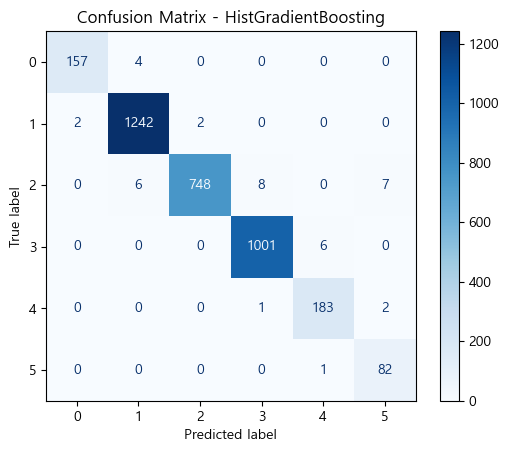

In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_obe_input_features= ['age','HE_wc', 'HE_BMI',  'HE_wt', 'HE_alt', 'HE_HDL_st2', 'HE_TG']

# XÏôÄ y Ï†ïÏùò
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# ÌÅ¥ÎûòÏä§Î≥Ñ F1 Ïä§ÏΩîÏñ¥ Ï∂úÎ†•
print(classification_report(y_test, y_pred, target_names=['Class 0 (Ï†ÄÏ≤¥Ï§ë)', 'Class 1 (Ï†ïÏÉÅ Ï≤¥Ï§ë)', 'Class 2 (Í≥ºÏ≤¥Ï§ë)',
                                                          'Class 3 (ÎπÑÎßå)', 'Class 4 (Í≥†ÎèÑÎπÑÎßå)', 'Class 5 (Ï¥àÍ≥†ÎèÑÎπÑÎßå)']))

# ÌèâÍ∞Ä ÏßÄÌëú Î∞è ÌòºÎèôÌñâÎ†¨
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - HistGradientBoosting")
plt.show()

In [190]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
y_proba = best_model.predict_proba(X_test_scaled)

# ROC AUC Score Í≥ÑÏÇ∞ (macro)
roc_auc_macro = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print(f"Macro ROC AUC Score: {roc_auc_macro:.4f}")


Macro ROC AUC Score: 0.9996


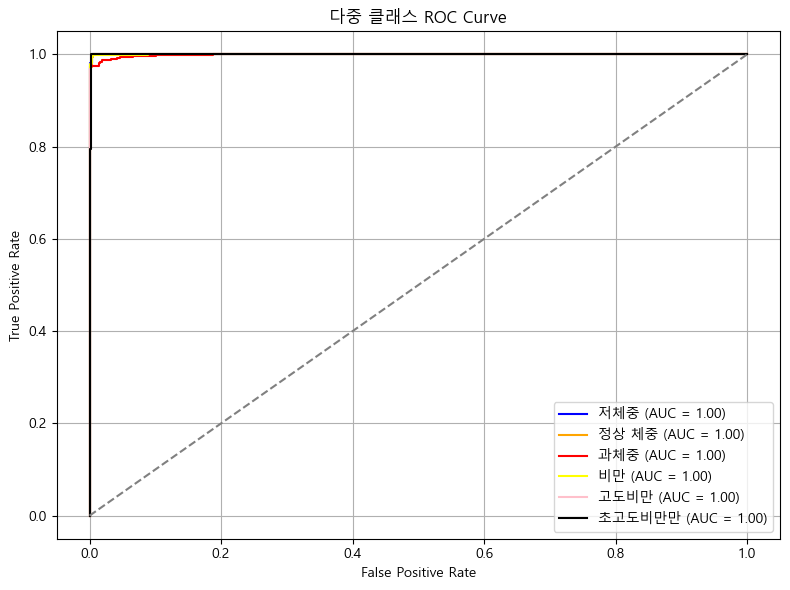

In [191]:
# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÌïúÍ∏Ä
class_names = ['Ï†ÄÏ≤¥Ï§ë', 'Ï†ïÏÉÅ Ï≤¥Ï§ë', 'Í≥ºÏ≤¥Ï§ë', 'ÎπÑÎßå', 'Í≥†ÎèÑÎπÑÎßå', 'Ï¥àÍ≥†ÎèÑÎπÑÎßåÎßå']
colors = ['blue', 'orange', 'red', 'yellow', 'pink', 'black']

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
for i in range(6):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc(fpr, tpr):.2f})", color=colors[i])

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Îã§Ï§ë ÌÅ¥ÎûòÏä§ ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()